In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

import windIO
import wind
import windCAD
import foam

## Basic definitions

In [2]:
dir_wtVl_tngE2 = r"D:/tempData_depot/simData_CandC/wt_tngE2/"
dir_wtVl_tngE3 = r"D:/tempData_depot/simData_CandC/wt_tngE3/"
dir_wtCp_tngE2 = r"E:/TNG/rawHFPI/tngE2p1/"
dir_wtCp_tngE3 = r"E:/TNG/rawHFPI/tngE3p1/"

dir_lesE2_00 = r"D:/tempData_depot/simData_CandC/ttuE010_000.0/"
dir_lesE2_45 = r"D:/tempData_depot/simData_CandC/ttuE010_450.2/"
dir_lesE2_90 = r"D:/tempData_depot/simData_CandC/ttuE010_900.1/"
dir_lesE3_00 = r"D:/tempData_depot/simData_CandC/ttuE087_000.0/"
dir_lesE3_45 = r"D:/tempData_depot/simData_CandC/ttuE087_450.2/"
dir_lesE3_90 = r"D:/tempData_depot/simData_CandC/ttuE087_900.0/"

saveFigs = True
figDir = r"D:/tempData_depot/simData_CandC/__plots/"

In [3]:
H = 0.08
B = 0.2744
D = 0.183
lScl=0.02

## Building Geometry

In [4]:
tapFile = r"D:/tempData_depot/simData_CandC/tngTapDefinition.csv"
data = pd.read_csv(tapFile)

faceID = [1,2,3,4,5,6]
name = ['Roof_1','Roof_2','Wall_1','Wall_2','Wall_3','Wall_4']
note = ['','','','','','']
origin = [[0,0,0.08],
          [0,-0.0915,0.07809375],
          [-0.1372,0,0],
          [0,-0.0915,0],
          [0.1372,0,0],
          [0,0.0915,0],]
basisVectors = [[[1,0,0],[0,0.999783057,0.020828814],[0,-0.020828814,0.999783057]],
                [[1,0,0],[0,0.999783057,-0.020828814],[0,0.020828814,0.999783057]],
                [[0,0,-1],[-1,0,0],[0,1,0]],
                [[1,0,0],[0,0,-1],[0,1,0]],
                [[0,0,1],[1,0,0],[0,1,0]],
                [[-1,0,0],[0,0,1],[0,1,0]],]
# origin_plt = [[0, 0],
#                 [0, -0.091519855],
#                 [0, -0.2332],
#                 [0, -0.18559375],
#                 [0, -0.2332],
#                 [0, -0.18559375],]
origin_plt = [[0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              [0, 0],
              ]
# basisVectors_plt = [[[0, -1], [1, 0]],
#                     [[0, -1],[1, 0]],
#                     [[1, 0], [0, 1]],
#                     [[0, -1], [1, 0]],
#                     [[-1, 0], [0, -1]],
#                     [[0, 1], [-1, 0]],]
# basisVectors_plt = [[[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     [[1, 0], [0, 1]],
#                     ]
basisVectors_plt = [[[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    [[0, 1], [-1, 0]],
                    ]
vertices = [[[-0.091519855,-0.1372],[0,-0.1372],[0,0.1372],[-0.091519855,0.1372],[-0.091519855,-0.1372]],
            [[0,-0.1372],[0.091519855,-0.1372],[0.091519855,0.1372],[0,0.1372],[0,-0.1372]],
            [[-0.0915,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0,-0.1532],[-0.0915,-0.15510625],[-0.0915,-0.2332]],
            [[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,-0.1372]],
            [[-0.0915,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0,0.1532],[-0.0915,0.15510625],[-0.0915,0.2332]],
            [[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,-0.1372]],]



In [5]:
# Zone Dict definitions

zoneDict = [
        {    # Face 1
            0:['NBCC', 'Zone c', np.array([[-0.091519855,-0.1372],[-0.071519855,-0.1372],[-0.071519855,-0.1172],[-0.091519855,-0.1172],[-0.091519855,-0.1372]])],
            1:['NBCC', 'Zone c', np.array([[-0.091519855,0.1172],[-0.071519855,0.1172],[-0.071519855,0.1372],[-0.091519855,0.1372],[-0.091519855,0.1172]])],
            2:['NBCC', 'Zone s', np.array([[-0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[-0.071519855,-0.1172],[-0.071519855,-0.1372]])],
            3:['NBCC', 'Zone s', np.array([[-0.091519855,-0.1172],[-0.071519855,-0.1172],[-0.071519855,0.1172],[-0.091519855,0.1172],[-0.091519855,-0.1172]])],
            4:['NBCC', 'Zone s', np.array([[-0.071519855,0.1172],[0,0.1172],[0,0.1372],[-0.071519855,0.1372],[-0.071519855,0.1172]])],
            5:['NBCC', 'Zone r', np.array([[-0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[-0.071519855,0.1172],[-0.071519855,-0.1172]])],
        },
        {   # Face 2
            0:['NBCC', 'Zone c', np.array([[0.091519855,-0.1372],[0.071519855,-0.1372],[0.071519855,-0.1172],[0.091519855,-0.1172],[0.091519855,-0.1372]])],
            1:['NBCC', 'Zone c', np.array([[0.091519855,0.1172],[0.071519855,0.1172],[0.071519855,0.1372],[0.091519855,0.1372],[0.091519855,0.1172]])],
            2:['NBCC', 'Zone s', np.array([[0.071519855,-0.1372],[0,-0.1372],[0,-0.1172],[0.071519855,-0.1172],[0.071519855,-0.1372]])],
            3:['NBCC', 'Zone s', np.array([[0.091519855,-0.1172],[0.071519855,-0.1172],[0.071519855,0.1172],[0.091519855,0.1172],[0.091519855,-0.1172]])],
            4:['NBCC', 'Zone s', np.array([[0.071519855,0.1172],[0,0.1172],[0,0.1372],[0.071519855,0.1372],[0.071519855,0.1172]])],
            5:['NBCC', 'Zone r', np.array([[0.071519855,-0.1172],[0,-0.1172],[0,0.1172],[0.071519855,0.1172],[0.071519855,-0.1172]])],
        },
        {   # Face 3
            0:['NBCC', 'Zone e', np.array([[-0.0915,-0.2332],[-0.0715,-0.2332],[-0.0715,-0.154689583],[-0.0915,-0.15510625],[-0.0915,-0.2332]])],
            1:['NBCC', 'Zone e', np.array([[0.0715,-0.2332],[0.0915,-0.2332],[0.0915,-0.15510625],[0.0715,-0.154689583],[0.0715,-0.2332]])],
            2:['NBCC', 'Zone w', np.array([[-0.0715,-0.2332],[0.0715,-0.2332],[0.0715,-0.154689583],[0,-0.1532],[-0.0715,-0.154689583],[-0.0715,-0.2332]])],
        },
        {   # Face 4
            0:['NBCC', 'Zone e', np.array([[0.107519855,-0.1372],[0.185613605,-0.1372],[0.185613605,-0.1172],[0.107519855,-0.1172],[0.107519855,-0.1372]])],
            1:['NBCC', 'Zone e', np.array([[0.107519855,0.1172],[0.185613605,0.1172],[0.185613605,0.1372],[0.107519855,0.1372],[0.107519855,0.1172]])],
            2:['NBCC', 'Zone w', np.array([[0.107519855,-0.1172],[0.185613605,-0.1172],[0.185613605,0.1172],[0.107519855,0.1172],[0.107519855,-0.1172]])],
        },
        {   # Face 5
            0:['NBCC', 'Zone e', np.array([[-0.0915,0.2332],[-0.0715,0.2332],[-0.0715,0.154689583],[-0.0915,0.15510625],[-0.0915,0.2332]])],
            1:['NBCC', 'Zone e', np.array([[0.0715,0.2332],[0.0915,0.2332],[0.0915,0.15510625],[0.0715,0.154689583],[0.0715,0.2332]])],
            2:['NBCC', 'Zone w', np.array([[-0.0715,0.2332],[0.0715,0.2332],[0.0715,0.154689583],[0,0.1532],[-0.0715,0.154689583],[-0.0715,0.2332]])],
        },
        {   # Face 6
            0:['NBCC', 'Zone e', np.array([[-0.107519855,-0.1372],[-0.185613605,-0.1372],[-0.185613605,-0.1172],[-0.107519855,-0.1172],[-0.107519855,-0.1372]])],
            1:['NBCC', 'Zone e', np.array([[-0.107519855,0.1172],[-0.185613605,0.1172],[-0.185613605,0.1372],[-0.107519855,0.1372],[-0.107519855,0.1172]])],
            2:['NBCC', 'Zone w', np.array([[-0.107519855,-0.1172],[-0.185613605,-0.1172],[-0.185613605,0.1172],[-0.107519855,0.1172],[-0.107519855,-0.1172]])],
        },
]

# file = caseDir+'NBCC_zoneDict.json'
# with open(file, 'w') as f:
#     json.dump(zoneDict,f, indent=4, separators=(',', ':'))

In [6]:
faces = []
for i,f in enumerate(faceID):
    idx = data.index[data.faceID == f]
    tapCoords = np.transpose(np.array([data.x[idx], data.y[idx]]))
    tapNos = np.array(data.tapNo[idx],dtype=int)
    idxOrig = idx

    fc = windCAD.face(
                name=name[i],
                ID=f,
                origin=origin[i],
                basisVectors=basisVectors[i],
                origin_plt=origin_plt[i],
                basisVectors_plt=basisVectors_plt[i],
                vertices=vertices[i],
                tapNo=tapNos,
                tapIdx=idxOrig,
                tapName=None,
                tapCoord=tapCoords,
                zoneDict=zoneDict[i],
                # nominalPanelAreas=[1.0e-4, 2.45e-4, 4.8e-4, 7.1e-4, 1e-3], #[5e-5, 8e-5, 1.5e-4, 5e-4],
                nominalPanelAreas=[4.4e-5, 8.15e-5, 1.3e-4, 5e-4, 6.8e-4, 1.3e-3,],   # Final! All are tested. 1.3e-3 results in blunt edge zones in the walls but no error.
                # nominalPanelAreas=[1.3e-3,], 
                # nominalPanelAreas=[4.8e-4, 7.2e-4, 1e-3],
                numOfNominalPanelAreas=3,
                )
    # fc.plot(figSize=[20,15], overlayPanels=True, overlayTaps=True, overlayTribs=True, overlayZones=True)
    faces.append(fc)

# file = caseDir+'ttu_bldgGeom.json'
# allFaces.writeToFile(file_basic=file)

Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (6, 6)
Shape of 'panelAreas': (6, 6)
Shape of 'pnlWeights': (6, 6)
Shape of 'tapIdxByPnl': (6, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (), (), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (6, 6)
Shape of 'panelAreas': (6, 6)
Shape of 'pnlWeights': (6, 6)
Shape of 'tapIdxByPnl': (6, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), (), (), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (3, 6)
Shape of 'panelAreas': (3, 6)
Shape of 'pnlWeights': (3, 6)
Shape of 'tapIdxByPnl': (3, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (3, 6)
Shape of 'panelAreas': (3, 6)
Shape of 'pnlWeights': (3, 6)
Shape of 'tapIdxByPnl': (3, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))
Generating panels ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


Shape of 'panels': (3, 6)
Shape of 'panelAreas': (3, 6)
Shape of 'pnlWeights': (3, 6)
Shape of 'tapIdxByPnl': (3, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))
Generating panels ...
Shape of 'panels': (3, 6)
Shape of 'panelAreas': (3, 6)
Shape of 'pnlWeights': (3, 6)
Shape of 'tapIdxByPnl': (3, 6)
Indecies of nominalPanelArea per each zone with error of unequal area between total sum of panel areas vs. zone: 
			((), (), ())
Indecies of panels within nominalPanelArea within zone with tap weights that do not sum to 1 : 
			(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")
d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\windCAD.py:446: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  print(f"Shape of 'panels': {np.shape(np.array(self.panels,dtype=object))}")


In [7]:
bldg = wind.bldgCp(bldgName='TTU_1to50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='GeomDefinition',
                )
print(bldg.error_in_panels)
print(bldg.error_in_zones)

[(([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], [])), (([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], [])), (([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], [])), (([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], [])), (([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], [])), (([], [], [], [], [], []), ([], [], [], [], [], []), ([], [], [], [], [], []))]
[((), (), (), (), (), ()), ((), (), (), (), (), ()), ((), (), ()), ((), (), ()), ((), (), ()), ((), (), ())]


(-0.25651999999999997,
 0.25651999999999997,
 -0.20417496549999997,
 0.20417496549999997)

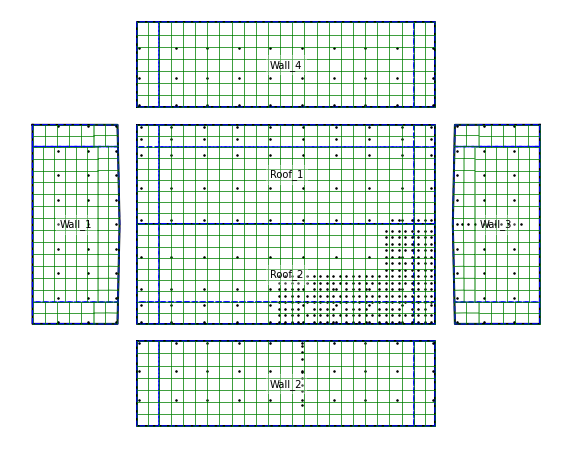

In [8]:
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot()

bldg.plotEdges(ax=ax)
bldg.plotZones(ax=ax)
bldg.plotTaps(ax=ax)
bldg.plotPanels(ax=ax,aIdx=2)

ax.axis('equal')
ax.axis('off')

## Wind field

### Read data

In [9]:
dt_cobraProbe = 3.7890e-04

temp = pd.read_csv(dir_wtVl_tngE2+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE2+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE2+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE2+"WofT.npy")
wtVel_E2 = wind.profile(name="BLWT(z_0=0.01m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

temp = pd.read_csv(dir_wtVl_tngE3+"profiles.csv")
U_TH = np.load(dir_wtVl_tngE3+"UofT.npy")
V_TH = np.load(dir_wtVl_tngE3+"VofT.npy")
W_TH = np.load(dir_wtVl_tngE3+"WofT.npy")
wtVel_E3 = wind.profile(name="BLWT(z_0=0.087m)", Z=temp.Z,UofT=U_TH,VofT=V_TH,WofT=W_TH,H=H,dt=dt_cobraProbe,nSpectAvg=64)

U_TH = V_TH = W_TH = None

In [10]:
lesVel_E2 = foam.processVelProfile(caseDir=dir_lesE2_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E2.name = "LES(z_0=0.01m)"

lesVel_E3 = foam.processVelProfile(caseDir=dir_lesE3_00, probeName='probes.V1',H=H, trimTimeSegs=[[0,1.0]])
lesVel_E3.name = "LES(z_0=0.087m)"

Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/ttuE010_000.0/
Probe read from:		D:/tempData_depot/simData_CandC/ttuE010_000.0//postProcessing/probes.V1
Target profile read from:	None
  >> Reading probe data ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\foam.py:541: UserWarning: 

WARNING! Non-uniform time step detected in 'probes.V1'.


  warnings.warn("\n\nWARNING! Non-uniform time step detected in '"+probeName+"'.\n\n")


             << Done!
  >> Processing profile data.
             << Done!
  >> Writing data to file.
             << Done!
  >> Finished reading probe data.
Processing OpenFOAM case:	D:/tempData_depot/simData_CandC/ttuE087_000.0/
Probe read from:		D:/tempData_depot/simData_CandC/ttuE087_000.0//postProcessing/probes.V1
Target profile read from:	None
  >> Reading probe data ...


d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\foam.py:541: UserWarning: 

WARNING! Non-uniform time step detected in 'probes.V1'.


  warnings.warn("\n\nWARNING! Non-uniform time step detected in '"+probeName+"'.\n\n")


             << Done!
  >> Processing profile data.
             << Done!
  >> Writing data to file.
             << Done!
  >> Finished reading probe data.


<Figure size 1008x432 with 0 Axes>

<Figure size 1008x432 with 0 Axes>

In [11]:
vel = wind.Profiles([wtVel_E2, lesVel_E2, wtVel_E3, lesVel_E3])
esdu74_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu74_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E2 = wind.ESDU74(z0=0.01, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))
esdu85_E3 = wind.ESDU74(z0=0.087, Zref=H/lScl, Uref=25.0, Z=np.logspace(-1,2,100))

### Plot wind field

#### Profiles $U$, $I_u$, $I_v$, and $I_w$

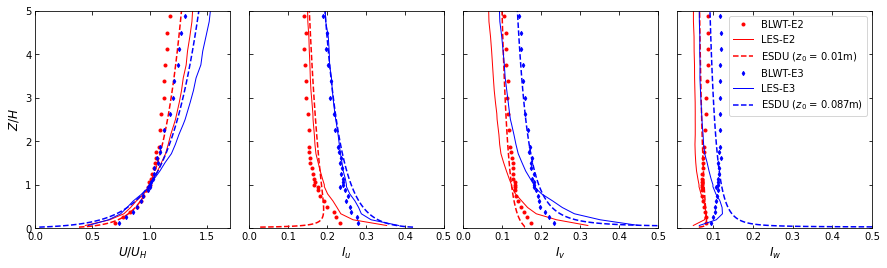

In [12]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

def typicalEdits(ax):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    ax.set_ylim([0,5])
    
fig = plt.figure(figsize=[15,4])
fig.subplots_adjust(wspace=0.1)

ax = plt.subplot(1,4,1)
ax.plot(wtVel_E2.UbyUh(), wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.UbyUh(), lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.U()/esdu74_E2.Uref, esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.UbyUh(), wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.UbyUh(), lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.U()/esdu74_E3.Uref, esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,1.7])
ax.set_xlabel(r'$U/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,4,2)
ax.plot(wtVel_E2.Iu, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iu, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iu(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iu, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iu, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iu(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,0.5])
# ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.set_xlabel(r'$I_u$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])


ax = plt.subplot(1,4,3)
ax.plot(wtVel_E2.Iv, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iv, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iv(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iv, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iv, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iv(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$I_v$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])


ax = plt.subplot(1,4,4)
ax.plot(wtVel_E2.Iw, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iw, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iw(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iw, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iw, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iw(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_xlim([0.01,0.5])
ax.set_xlabel(r'$I_w$',fontsize=fntSz)
typicalEdits(ax)
ax.yaxis.set_ticklabels([])
ax.legend()

plt.show()

if saveFigs:
    fig.savefig(figDir+"profiles.svg",format='svg',dpi=1200, bbox_inches='tight')

#### $U$ and $I_u$ profiles and $S_{uu}$ spectra

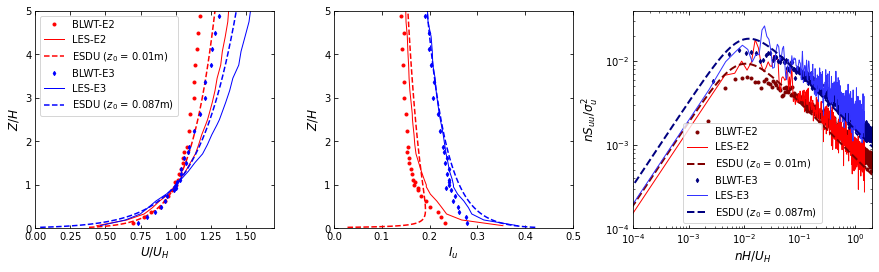

In [13]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

def typicalEdits(ax):
    ax.tick_params(axis='both',direction='in',which='both',top=True,right=True)
    
fig = plt.figure(figsize=[15,4])
fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.plot(wtVel_E2.UbyUh(), wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.UbyUh(), lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.U()/esdu74_E2.Uref, esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.UbyUh(), wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.UbyUh(), lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.U()/esdu74_E3.Uref, esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_ylim([0,5])
ax.set_xlim([0,1.7])
ax.set_xlabel(r'$U/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)


ax = plt.subplot(1,3,2)
ax.plot(wtVel_E2.Iu, wtVel_E2.ZbyH(), label='BLWT-E2', 
        color=colE2, linestyle='none', marker=mrkE2, ms=3)
ax.plot(lesVel_E2.Iu, lesVel_E2.ZbyH(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.plot(esdu74_E2.Iu(), esdu74_E2.Z/esdu74_E2.Zref, label=r'ESDU ($z_0$ = 0.01m)', 
        color=colE2, linestyle='--', lw=1.5)

ax.plot(wtVel_E3.Iu, wtVel_E3.ZbyH(), label='BLWT-E3', 
        color=colE3, linestyle='none', marker=mrkE3, ms=3)
ax.plot(lesVel_E3.Iu, lesVel_E3.ZbyH(), label='LES-E3', 
        color=colE3, linestyle='-', lw=1.0)
ax.plot(esdu74_E3.Iu(), esdu74_E3.Z/esdu74_E3.Zref, label=r'ESDU ($z_0$ = 0.087m)', 
        color=colE3, linestyle='--', lw=1.5)
ax.set_ylim([0,5])
ax.set_xlim([0,0.5])
ax.set_ylabel(r'$Z/H$',fontsize=fntSz)
ax.set_xlabel(r'$I_u$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([1e-4,2e0])
ax.set_ylim([1e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)

plt.show()

if saveFigs:
    fig.savefig(figDir+"profAndSpect.svg",format='svg',dpi=1200, bbox_inches='tight')

#### $S_{uu}$, $S_{vv}$, and $S_{ww}$ spectra

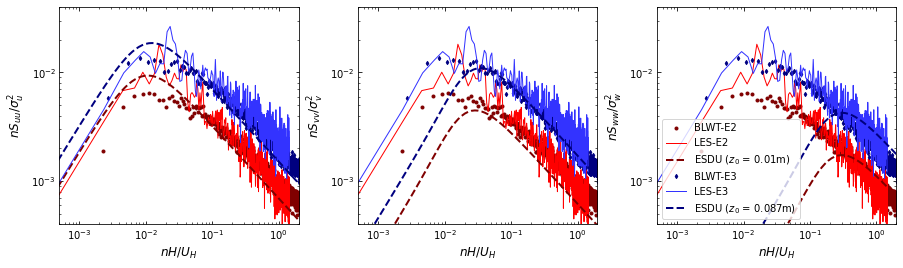

In [14]:
colE2, colE3 = 'r', 'b'
mrkE2, mrkE3 = 'o', 'd'
fntSz = 12

    
fig = plt.figure(figsize=[15,4])

fig.subplots_adjust(wspace=0.25)

ax = plt.subplot(1,3,1)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSuu(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSuu(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSuu()[0], esdu74_E2.rSuu()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSuu(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSuu(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSuu()[0], esdu74_E3.rSuu()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{uu}/\sigma_u^2$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,2)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSvv(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSvv(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSvv()[0], esdu74_E2.rSvv()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSvv(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSvv(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSvv()[0], esdu74_E3.rSvv()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{vv}/\sigma_v^2$',fontsize=fntSz)
typicalEdits(ax)


ax = plt.subplot(1,3,3)
ax.loglog(wtVel_E2.SpectH.rf(), wtVel_E2.SpectH.rSww(), label='BLWT-E2', 
        color=[0.5,0,0], linestyle='none', marker=mrkE2, ms=3)
ax.loglog(lesVel_E2.SpectH.rf(), lesVel_E2.SpectH.rSww(), label='LES-E2', 
        color=colE2, linestyle='-', lw=1.0)
ax.loglog(esdu74_E2.rSww()[0], esdu74_E2.rSww()[1], label=r'ESDU ($z_0$ = 0.01m)', 
        color=[.5,0,0], linestyle='--', lw=2)

ax.loglog(wtVel_E3.SpectH.rf(), wtVel_E3.SpectH.rSww(), label='BLWT-E3', 
        color=[0,0,.5], linestyle='none', marker=mrkE3, ms=3)
ax.loglog(lesVel_E3.SpectH.rf(), lesVel_E3.SpectH.rSww(), label='LES-E3', 
        color=[.2,.2,1], linestyle='-', lw=1.0)
ax.loglog(esdu74_E3.rSww()[0], esdu74_E3.rSww()[1], label=r'ESDU ($z_0$ = 0.087m)', 
        color=[0,0,.5], linestyle='--', lw=2)
ax.set_xlim([5e-4,2e0])
ax.set_ylim([4e-4,4e-2])
ax.set_xlabel(r'$nH/U_H$',fontsize=fntSz)
ax.set_ylabel(r'$nS_{ww}/\sigma_w^2$',fontsize=fntSz)
ax.legend()
typicalEdits(ax)

plt.show()

if saveFigs:
    fig.savefig(figDir+"spectra.svg",format='svg',dpi=1200, bbox_inches='tight')

## Surface pressure, $C_p$

### Read data

In [15]:
peakMethod = 'minmax'
badTaps = []
Uh_FS = 25.0

#### Wind tunnel data

In [100]:
mainRefPitotChnlIdx = 2
fps2mps = 0.3048
Zpitot = 1.48
Ntaps = 456
tMax = 12000  # approximately keeping the same duration
AoAids = ['001', '010', '019']

In [101]:
N_AoA = len(AoAids)
AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for d,aoa in enumerate(AoAids):
    file_pssd = dir_wtCp_tngE2+'TNGp1E02R001P'+ AoAids[d] +'a.pssd'
    file_pssr = dir_wtCp_tngE2+'TNGp1E02R001P'+ AoAids[d] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if d == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[d,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[d,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[d] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[d] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)

wtCp_tngE2 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='tngE2p1',
                refProfile=wtVel_E2,
                Zref_input=Zpitot,
                Uref_input=Upitot,
                samplingFreq=sampleRate[0],
                AoA=AoA,
                CpOfT=CpTH[:,:,:tMax],
                badTaps=None, 
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod=peakMethod,
                # keepTH=False,
                )
CpTH = analog = cp_data = None

In [102]:
N_AoA = len(AoAids)
AoA = np.zeros((N_AoA))
sampleRate = np.zeros((N_AoA))

for d,aoa in enumerate(AoAids):
    file_pssd = dir_wtCp_tngE3+'TNGp1E03R001P'+ AoAids[d] +'a.pssd'
    file_pssr = dir_wtCp_tngE3+'TNGp1E03R001P'+ AoAids[d] +'a.pssr'

    cp_data,analog,WTTDATALOG = windIO.readPSSfile(file_pssr,file_pssd)

    if d == 0:
        N_t = np.shape(cp_data)[0]
        CpTH = np.zeros((N_AoA,Ntaps,N_t)) # [N_AoA,Ntaps,Ntime]
        UpitotOfT = np.zeros((N_AoA,N_t))
    CpTH[d,:,:] = np.transpose(cp_data[:,0:Ntaps])
    UpitotOfT[d,:] = 29.917 * np.sqrt(analog[:,mainRefPitotChnlIdx]) * fps2mps
    AoA[d] = np.round(WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][16][0][0],1)
    sampleRate[d] = WTTDATALOG["APPSPE"][0][0][0][0][0][0][0][12][0][0]
Upitot = np.mean(UpitotOfT,axis=1)

wtCp_tngE3 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='tngE3p1',
                refProfile=wtVel_E3,
                Zref_input=Zpitot,
                Uref_input=Upitot,
                samplingFreq=sampleRate[0],
                AoA=AoA,
                CpOfT=CpTH[:,:,:tMax],
                badTaps=None,
                reReferenceCpToH=True,
                pOfT=None,
                p0ofT=None,
                CpStats=None,
                peakMethod=peakMethod,
                # keepTH=False,
                )
CpTH = analog = cp_data = None

#### LES data

In [21]:
p0_ProbeName='probes.V0'
p0Idx = 30

trimTimeSegs=[[0,1.0]]
AoA = [0.0,45.0,90.0]

In [92]:
nT = 10300
_, _, p0OfT = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE2_00+'postProcessing/', field='p', trimTimeSegs=trimTimeSegs,)
pOfTfile = dir_lesE2_00+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT)
pOfT = np.reshape(pOfT,(1,m,n))
print(np.shape(pOfT))
p0OfT = np.reshape(np.transpose(p0OfT)[p0Idx,:n],(1,-1))
print(np.shape(p0OfT))

pOfTfile = dir_lesE2_45+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT_)
pOfT = np.concatenate((pOfT, np.reshape(pOfT_,(1,m,n))), axis=0)
print(np.shape(pOfT))

pOfTfile = dir_lesE2_90+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT_)
pOfT = np.concatenate((pOfT, np.reshape(pOfT_,(1,m,n))), axis=0)
print(np.shape(pOfT))


lesCp_E2 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='LES-E2',
                refProfile=lesVel_E2,
                Zref_input=H,  # for the Cp TH being input below
                Uref_input=lesVel_E2.Uh,  # for the Cp TH being input below
                samplingFreq=lesVel_E2.samplingFreq,
                AoA=AoA,
                pOfT=pOfT[:,:,100:],
                p0ofT=p0OfT[:,100:],
                peakMethod=peakMethod,
                # keepTH=False,
                )
pOfT = pOfT_ = None

(1, 456, 10300)
(1, 10300)
(2, 456, 10300)
(3, 456, 10300)


In [96]:
nT = 9930
pOfTfile = dir_lesE3_00+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT)
pOfT = np.reshape(pOfT,(1,m,n))

_, _, p0OfT = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_00+'postProcessing/', field='p', trimTimeSegs=trimTimeSegs,)
p0OfT = np.reshape(np.transpose(p0OfT)[p0Idx,:n],(1,-1))


pOfTfile = dir_lesE3_45+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT_)
pOfT = np.concatenate((pOfT, np.reshape(pOfT_,(1,m,n))), axis=0)

_, _, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_45+'postProcessing/', field='p', trimTimeSegs=trimTimeSegs,)
p0OfT = np.concatenate((p0OfT, np.reshape(np.transpose(p0OfT_)[p0Idx,:n],(1,-1))), axis=0)


pOfTfile = dir_lesE3_90+'postProcessing/wallPressure_pOfT_TNGtaps.npy'
pOfT_ = np.load(pOfTfile)[:,:nT]
m,n = np.shape(pOfT_)
pOfT = np.concatenate((pOfT, np.reshape(pOfT_,(1,m,n))), axis=0)

_, _, p0OfT_ = foam.readProbe(probeName=p0_ProbeName, postProcDir=dir_lesE3_90+'postProcessing/', field='p', trimTimeSegs=trimTimeSegs,)
p0OfT = np.concatenate((p0OfT, np.reshape(np.transpose(p0OfT_)[p0Idx,:n],(1,-1))), axis=0)

lesCp_E3 = wind.bldgCp(bldgName='TTU_1:50_TNG',
                faces=faces,
                H=H,D=D,B=B,roofSlope=1.2,lScl=lScl,
                caseName='LES-E3',
                refProfile=lesVel_E3,
                Zref_input=H,  # for the Cp TH being input below
                Uref_input=lesVel_E3.Uh,  # for the Cp TH being input below
                samplingFreq=lesVel_E3.samplingFreq,
                AoA=AoA,
                pOfT=pOfT[:,:,100:],
                p0ofT=np.reshape(p0OfT[:,100:], (N_AoA,1,-1)),
                peakMethod=peakMethod,
                # keepTH=False,
                )
pOfT = pOfT_ = None

d:\OneDrive - The University of Western Ontario\Documents\PhD\Thesis\CodeRepositories\windCalc\src\foam.py:541: UserWarning: 

WARNING! Non-uniform time step detected in 'probes.V0'.


  warnings.warn("\n\nWARNING! Non-uniform time step detected in '"+probeName+"'.\n\n")


### $C_p$ Plots

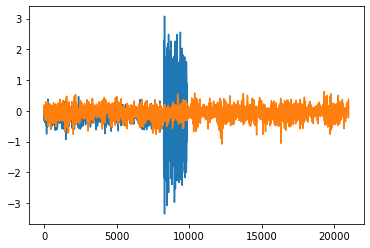

In [99]:
d = 0
tap = 209
t = bldg.tapNo.index(tap)

plt.figure()
plt.plot(lesCp_E3.CpOfT[d,t,:])
plt.plot(wtCp_tngE3.CpOfT[d,t,:])
plt.show()

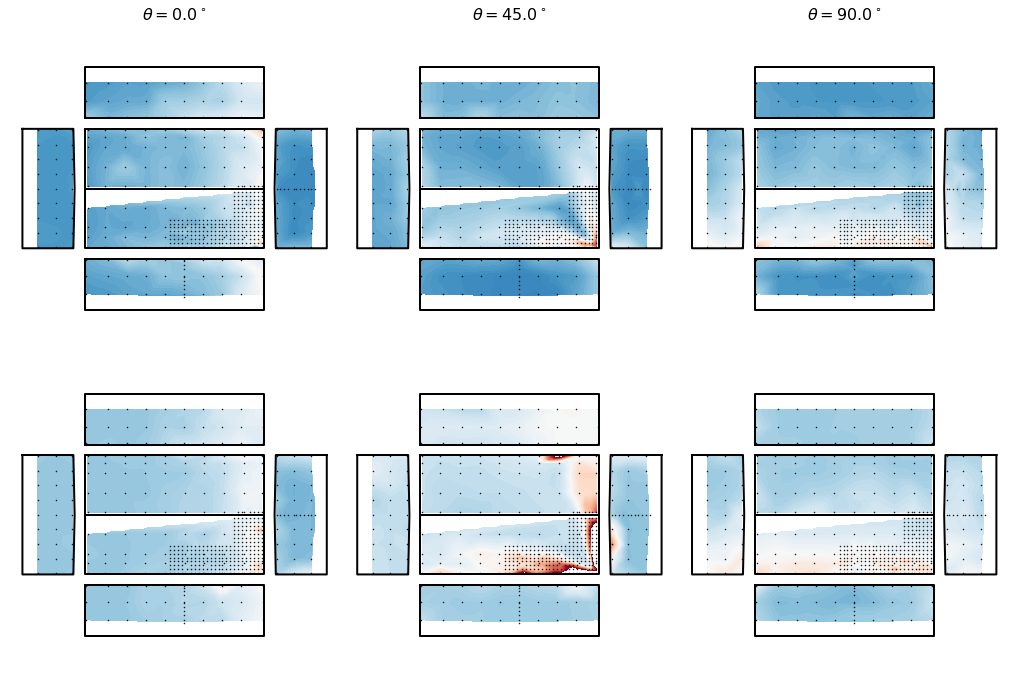

In [76]:
nrow, ncol = 2, N_AoA

fld = 'peakMin'
fldRange=[-10,2]

fig, axs = plt.subplots(nrow, ncol)
fig.set_figheight(6*nrow)
fig.set_figwidth(6*ncol)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for d,D in enumerate(lesCp_E2.AoA):
    ax = axs[0,d]
    wtCp_tngE2.plotTapCpStatContour(fieldName=fld,dxnIdx=d,ax=ax,fldRange=fldRange)
    wtCp_tngE2.plotEdges(ax=ax,showName=False)
    wtCp_tngE2.plotTaps(ax=ax,dotSz=1)
    ax.axis('off')
    ax.axis('equal')
    ax.set_title(r'$\theta='+str(np.round(D,0))+r'^\circ$',fontsize=16)

    ax = axs[1,d]
    lesCp_E2.plotTapCpStatContour(fieldName=fld,dxnIdx=d,ax=ax,fldRange=fldRange)
    lesCp_E2.plotEdges(ax=ax,showName=False)
    wtCp_tngE2.plotTaps(ax=ax,dotSz=1)
    ax.axis('off')
    ax.axis('equal')
    
if saveFigs:
    fig.savefig(figDir+"Cp_"+fld+".svg",format='svg',dpi=1200, bbox_inches='tight')

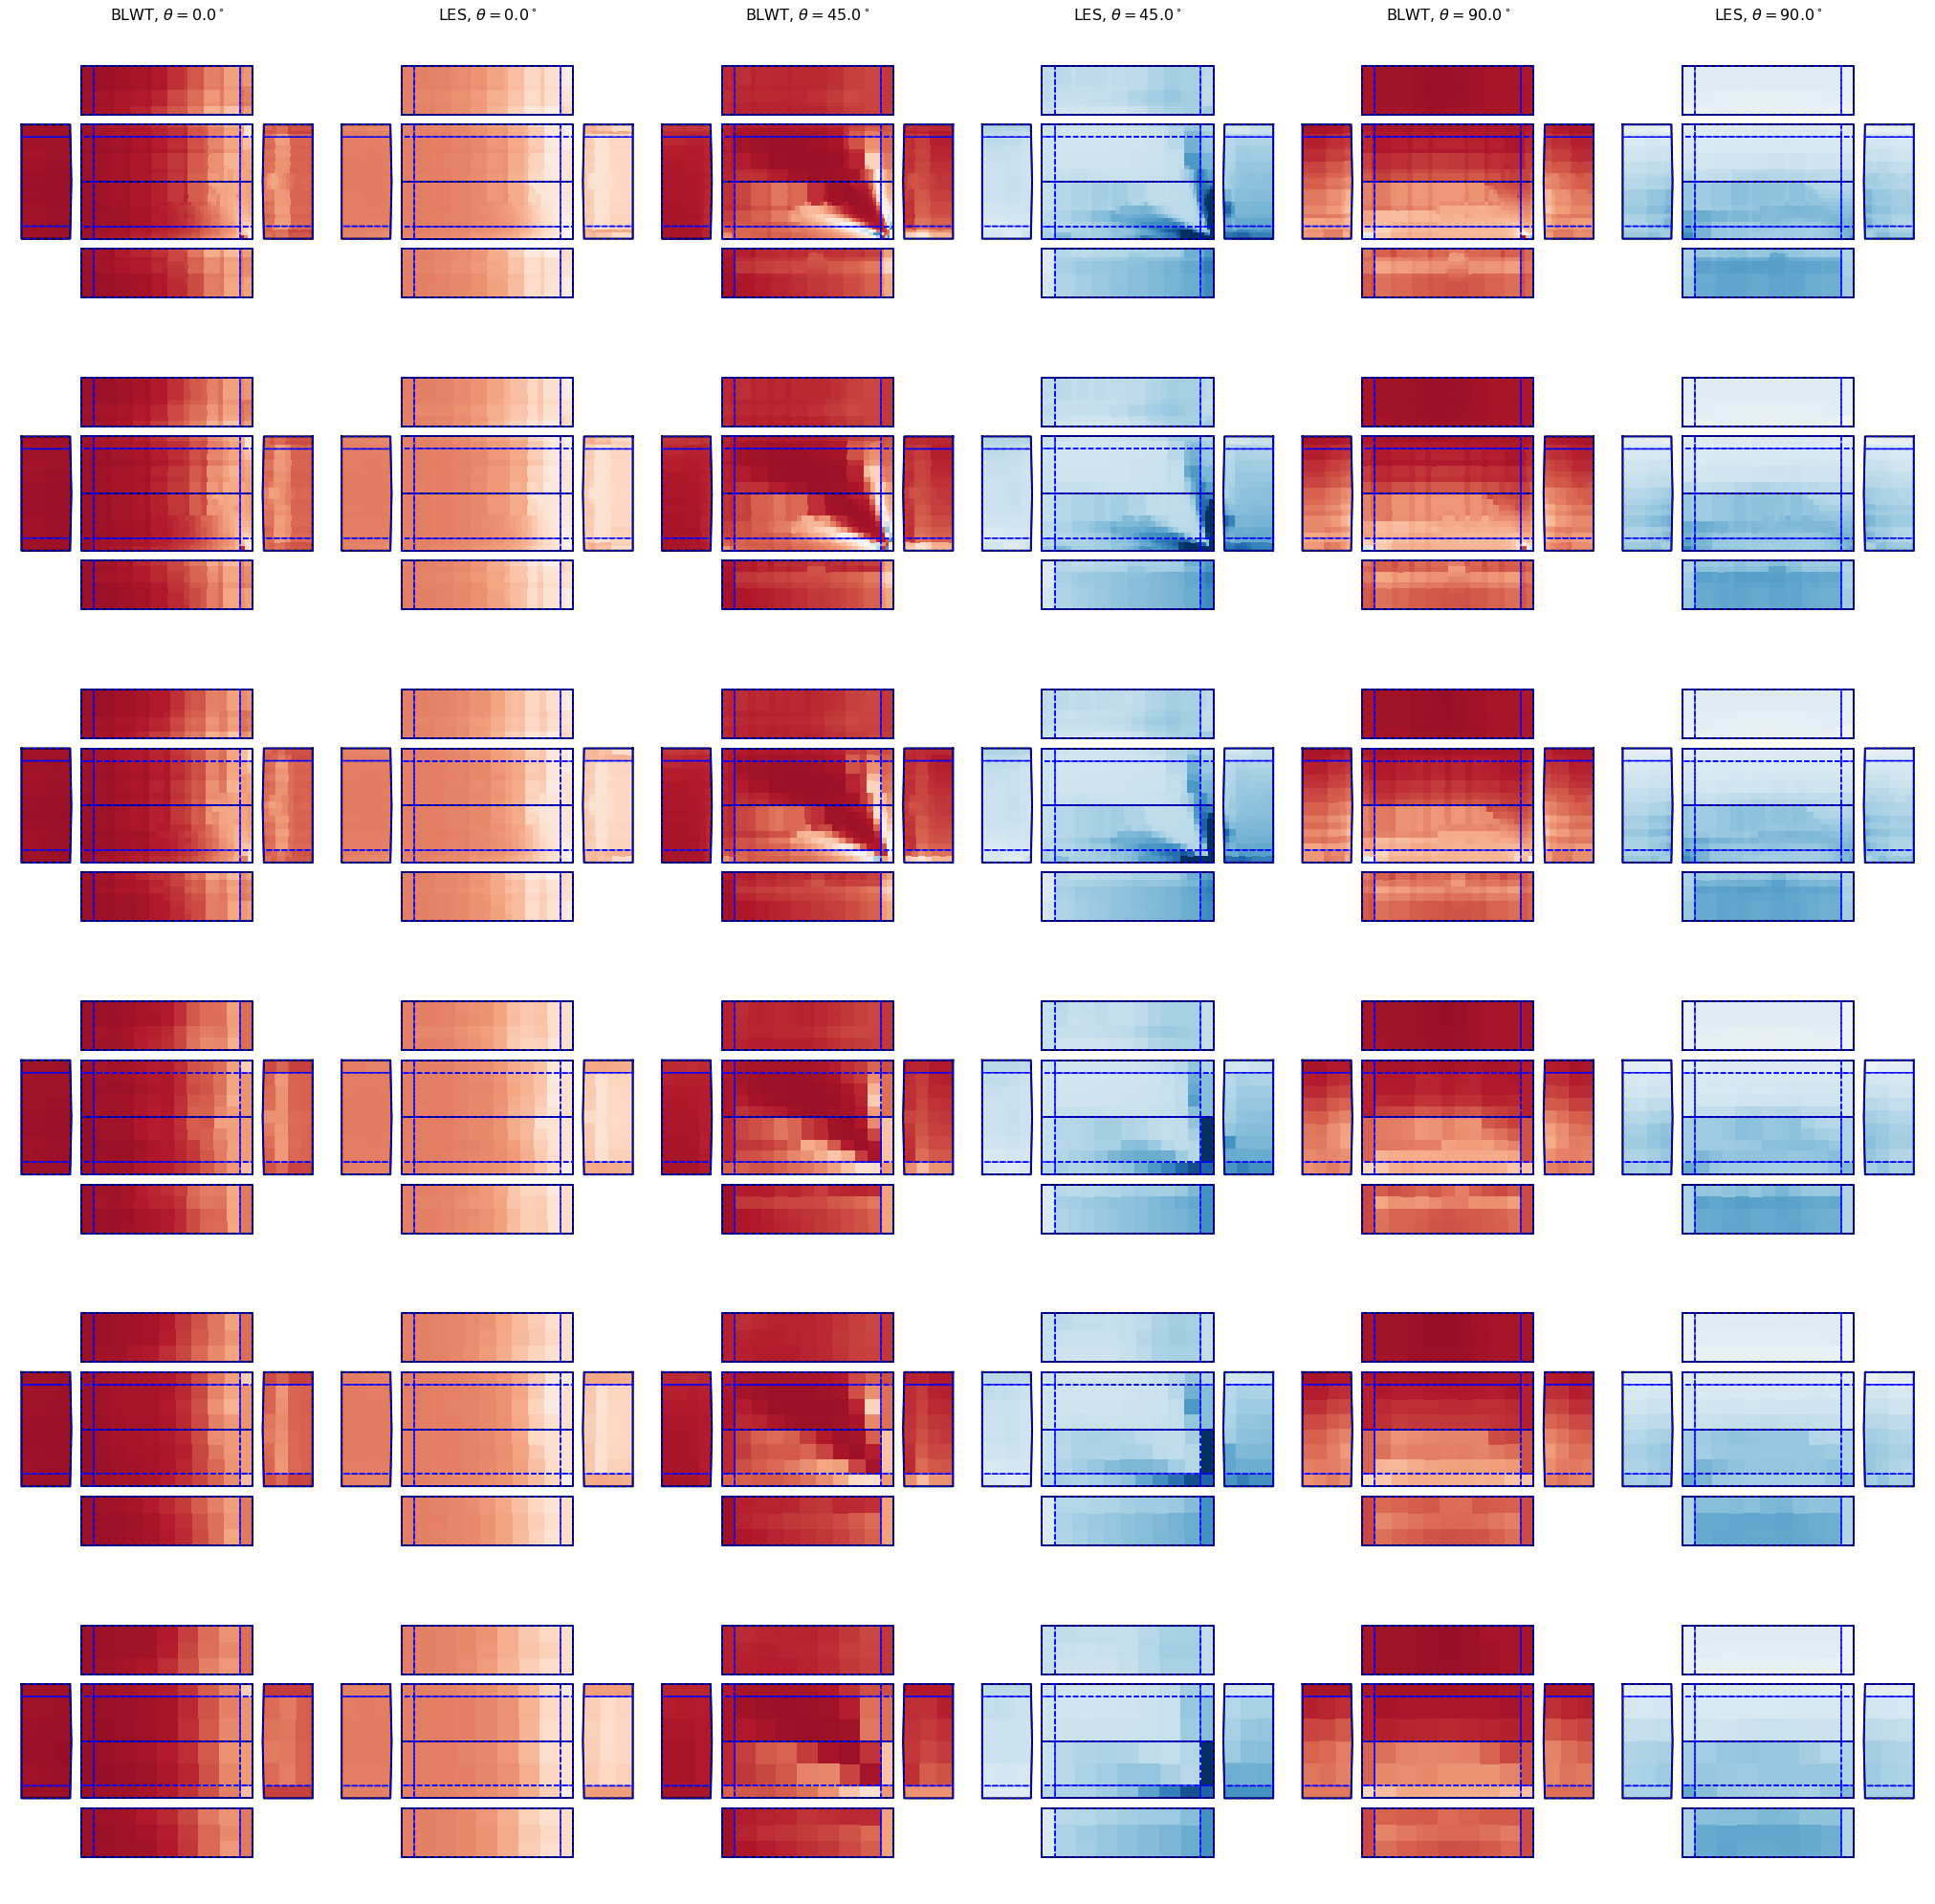

In [54]:
ncol, nrow = N_AoA*2, len(bldg[0].nominalPanelAreas)

fld = 'std'
fldRange=[0,1]

fig, axs = plt.subplots(nrow, ncol)
fig.set_figheight(6*nrow)
fig.set_figwidth(6*ncol)
fig.subplots_adjust(wspace=0.0, hspace=0.0)

for a,A in enumerate(bldg[0].nominalPanelAreas):
    for d,D in enumerate(lesCp_E2.AoA):

        ax = axs[a,d*2]
        wtCp_tngE2.plotPanelCpStatContour(fieldName=fld,dxnIdx=d,aIdx=a,ax=ax,fldRange=fldRange)
        wtCp_tngE2.plotEdges(ax=ax,showName=False)
        wtCp_tngE2.plotZones(ax=ax)
        ax.axis('off')
        ax.axis('equal')
        if a == 0:
            ax.set_title(r'BLWT, $\theta='+str(D)+r'^\circ$',fontsize=16)

        ax = axs[a,d*2+1]
        lesCp_E2.plotPanelCpStatContour(fieldName=fld,dxnIdx=d,aIdx=a,ax=ax,fldRange=fldRange)
        lesCp_E2.plotEdges(ax=ax,showName=False)
        wtCp_tngE2.plotZones(ax=ax)
        ax.axis('off')
        ax.axis('equal')
        if a == 0:
            ax.set_title(r'LES, $\theta='+str(D)+r'^\circ$',fontsize=16)
if saveFigs:
    fig.savefig(figDir+"areaAvgCp_"+fld+".svg",format='svg',dpi=1200, bbox_inches='tight')

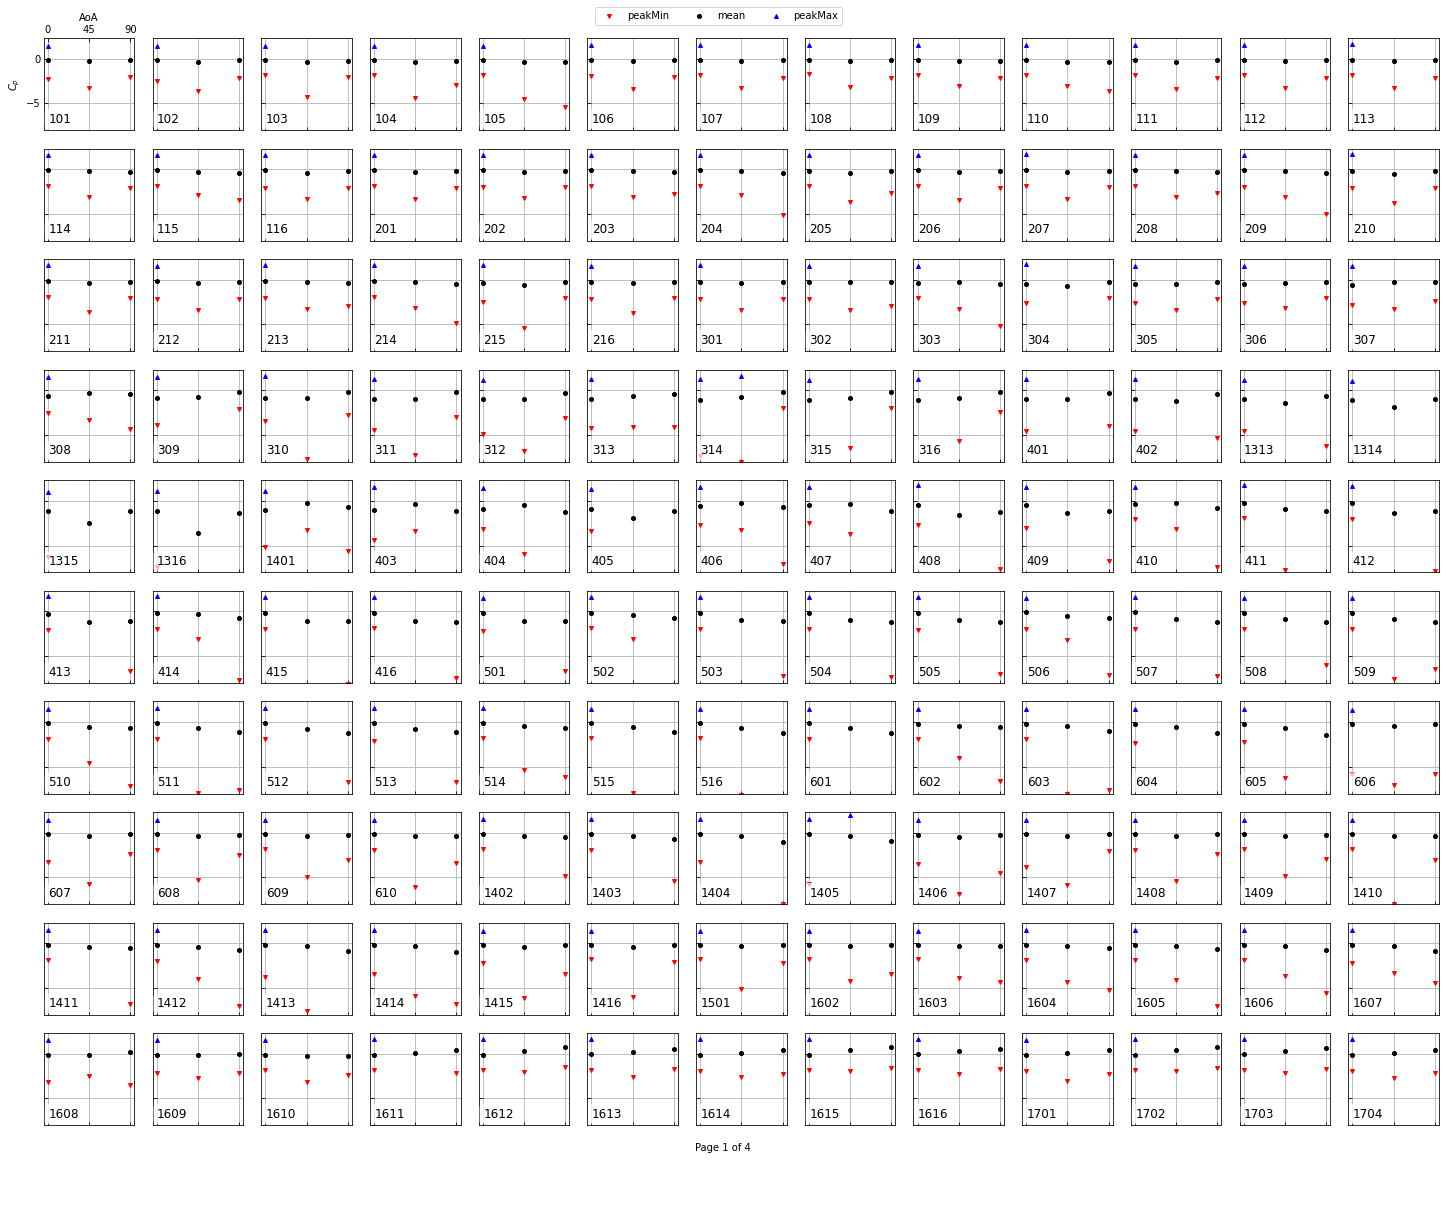

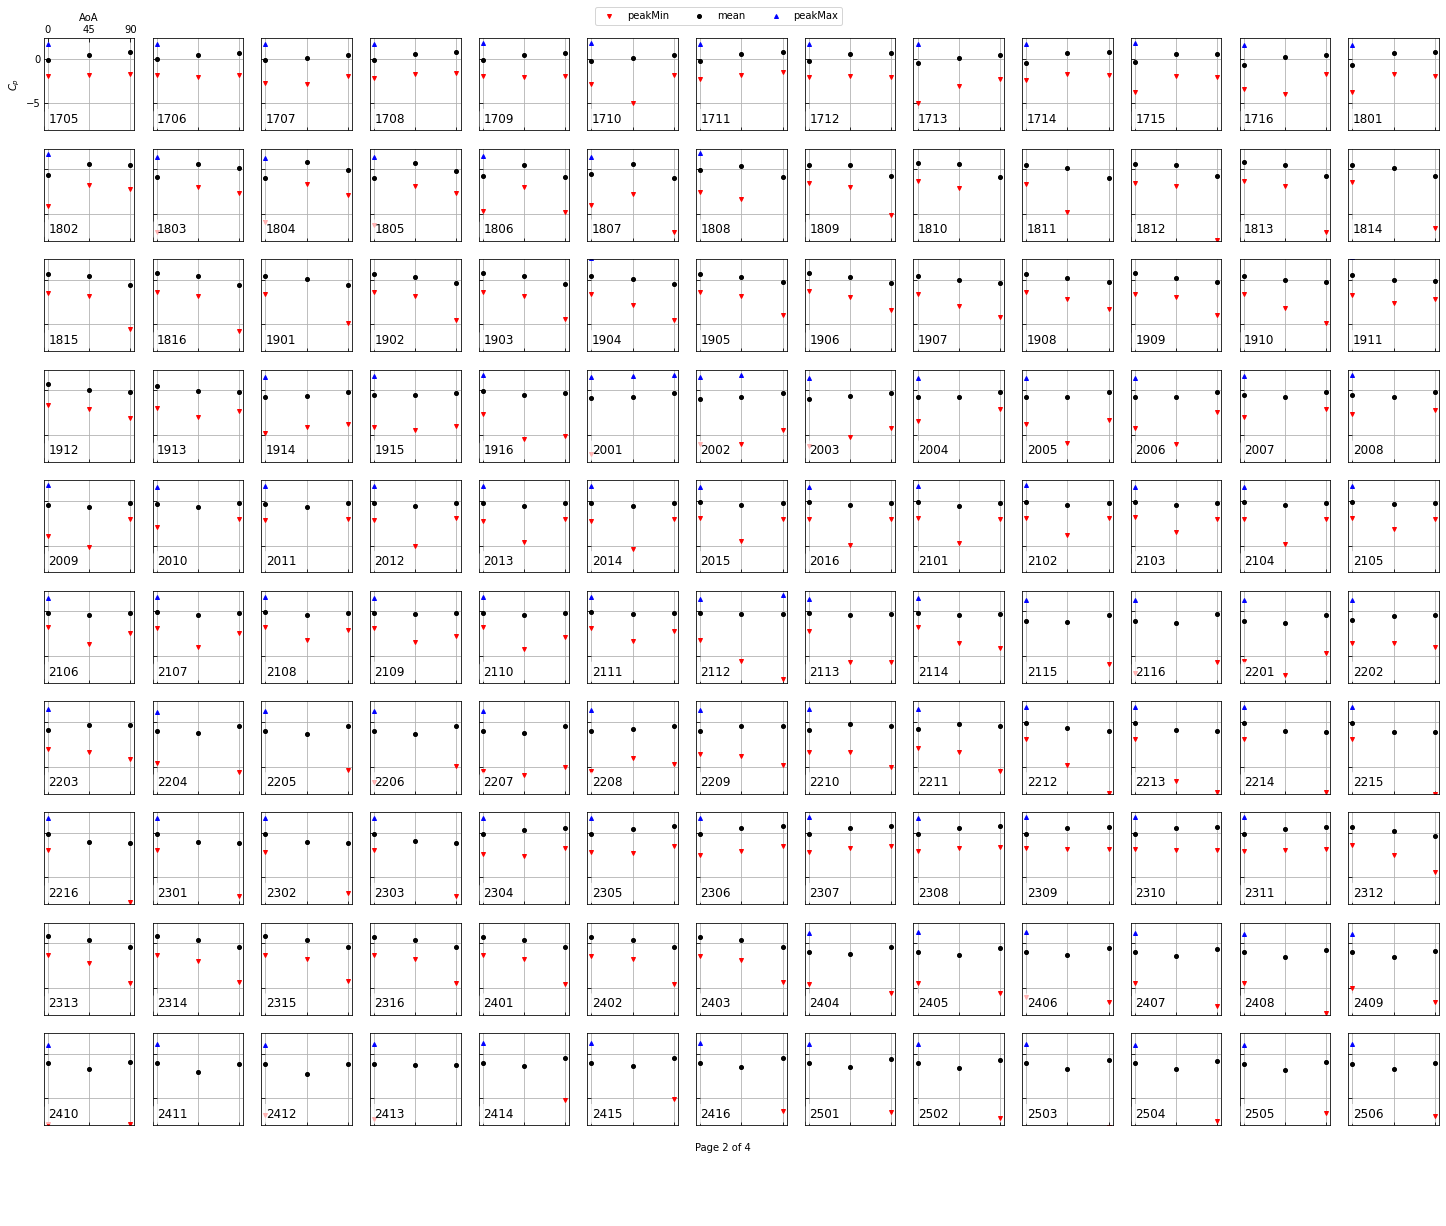

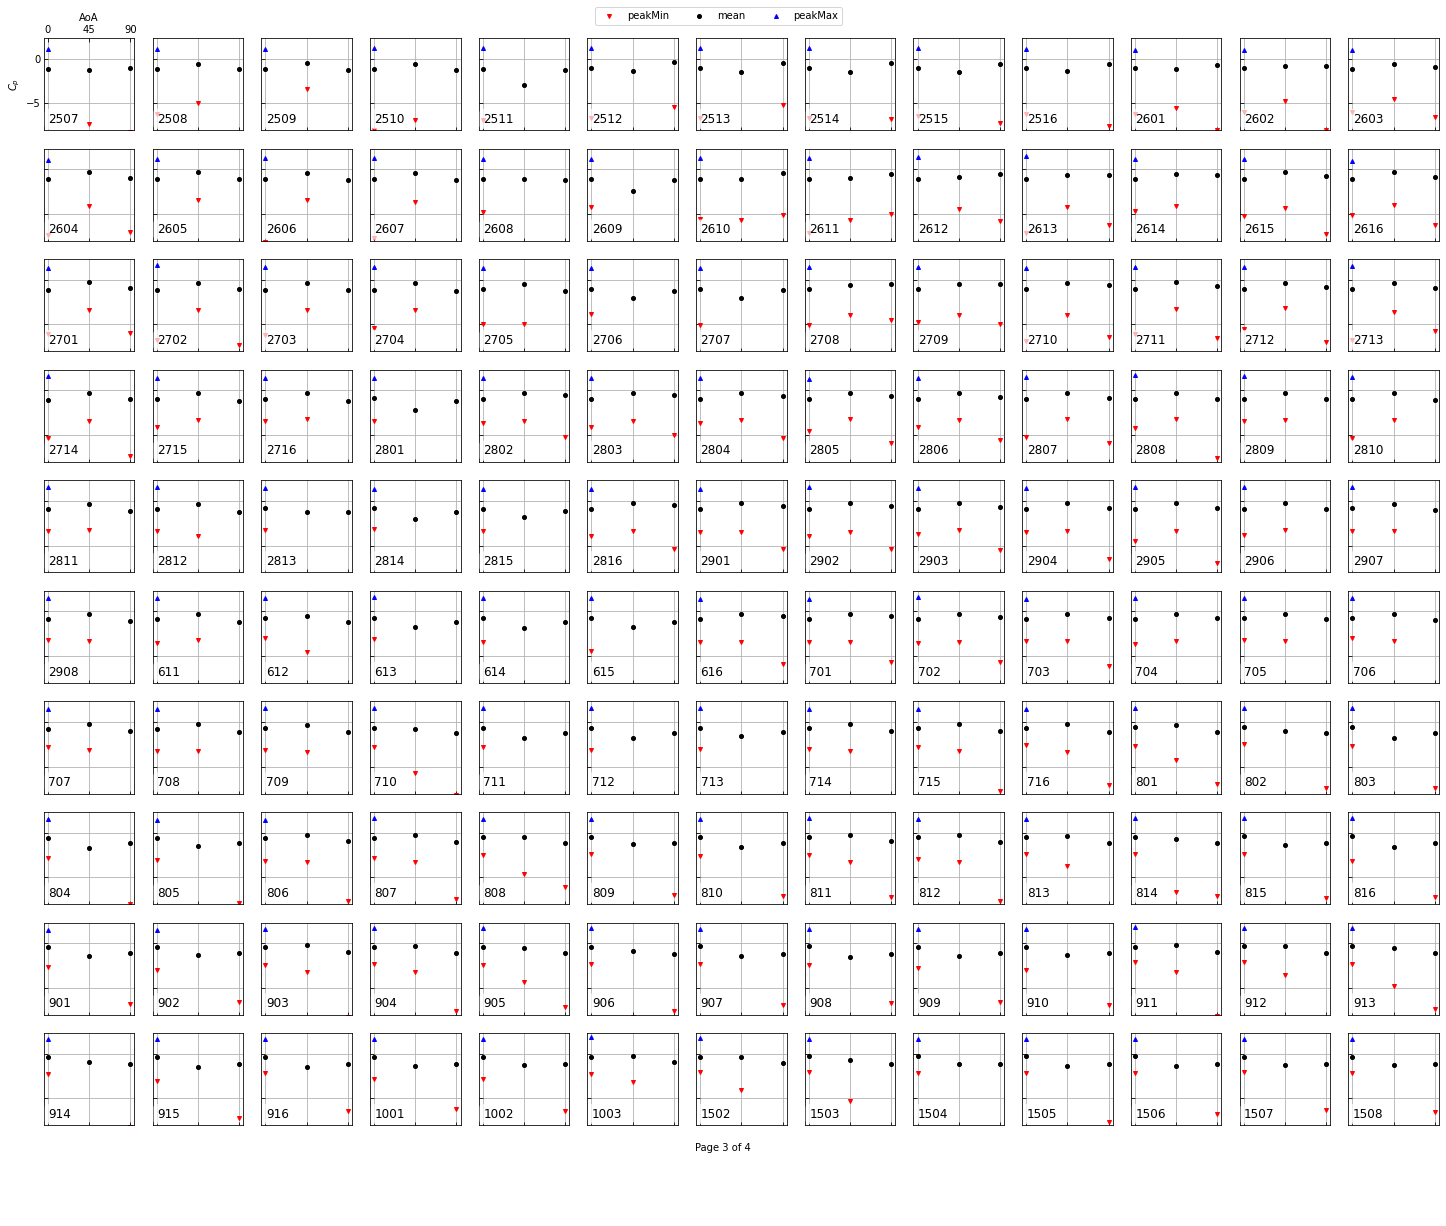

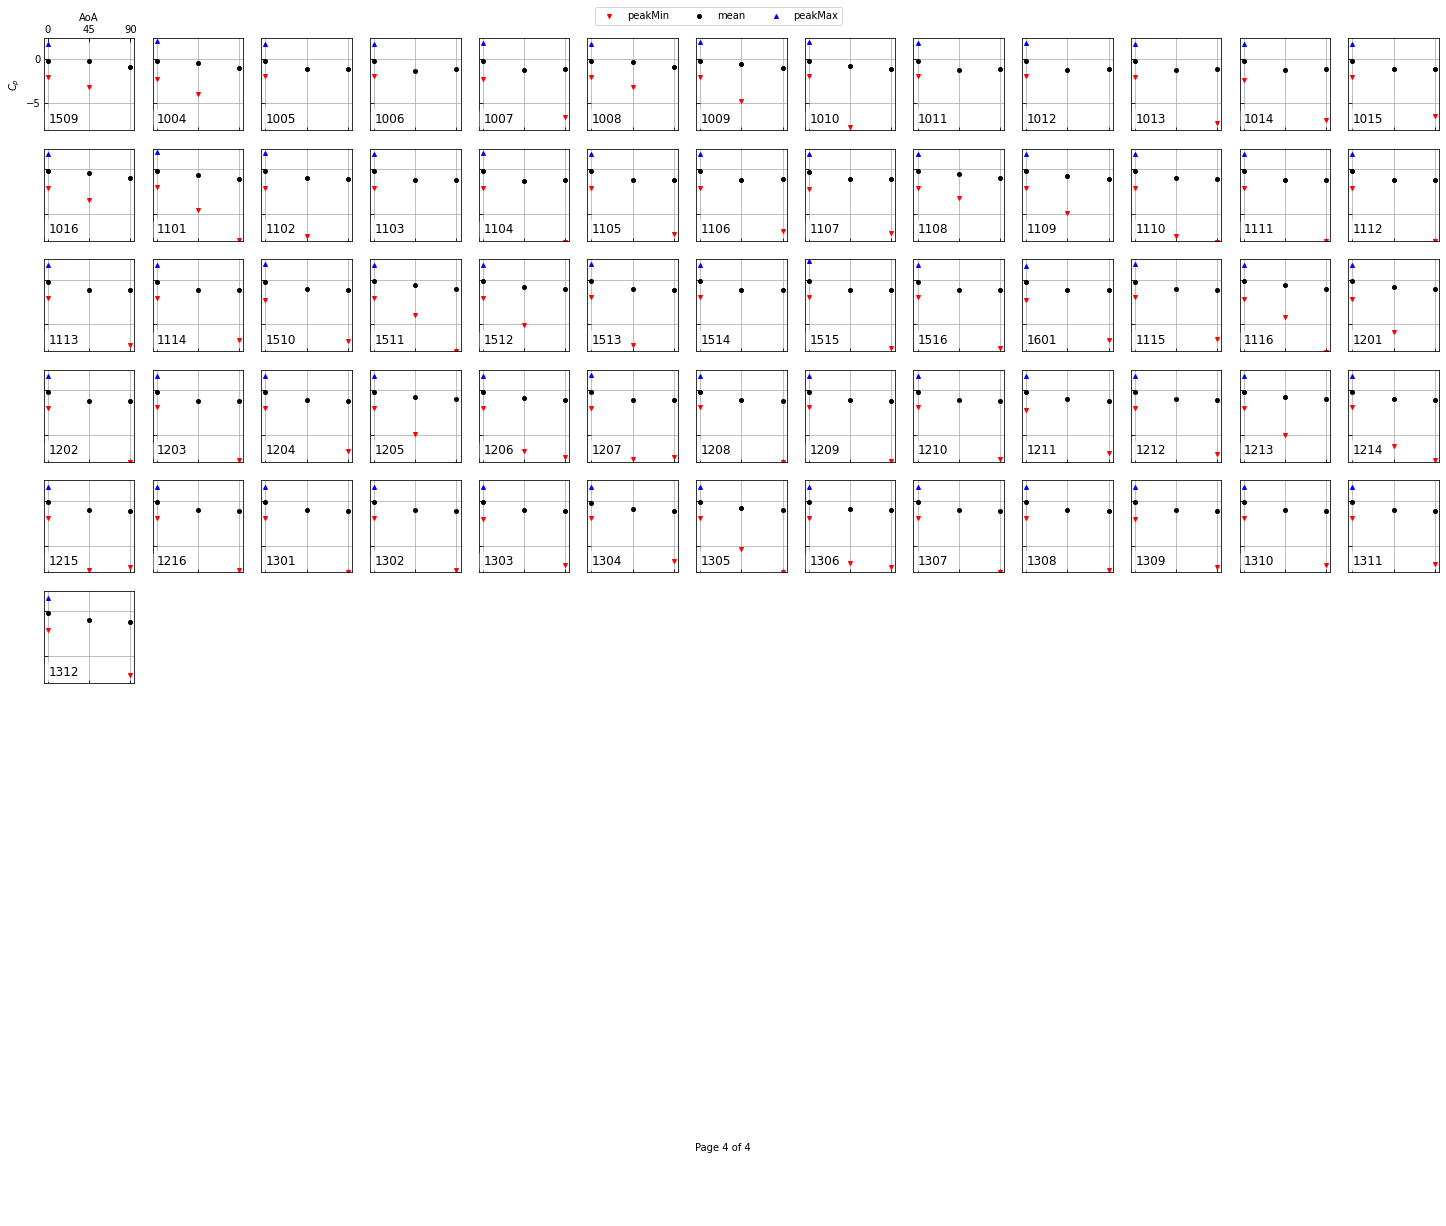

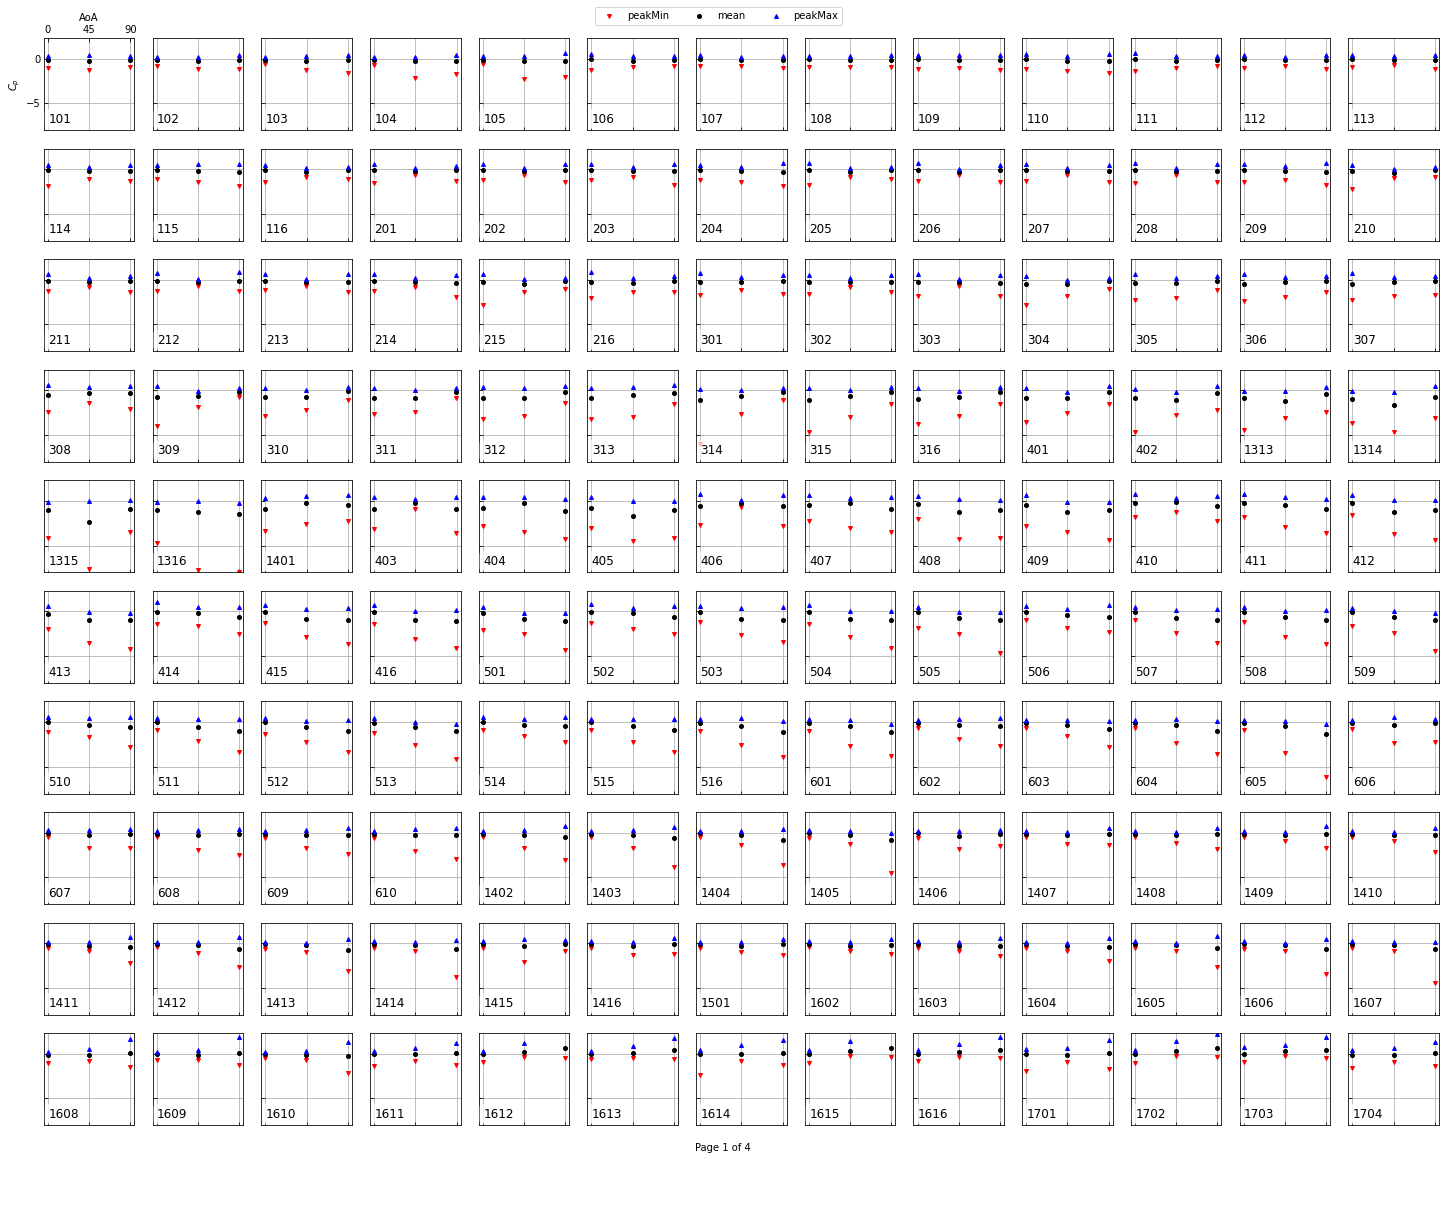

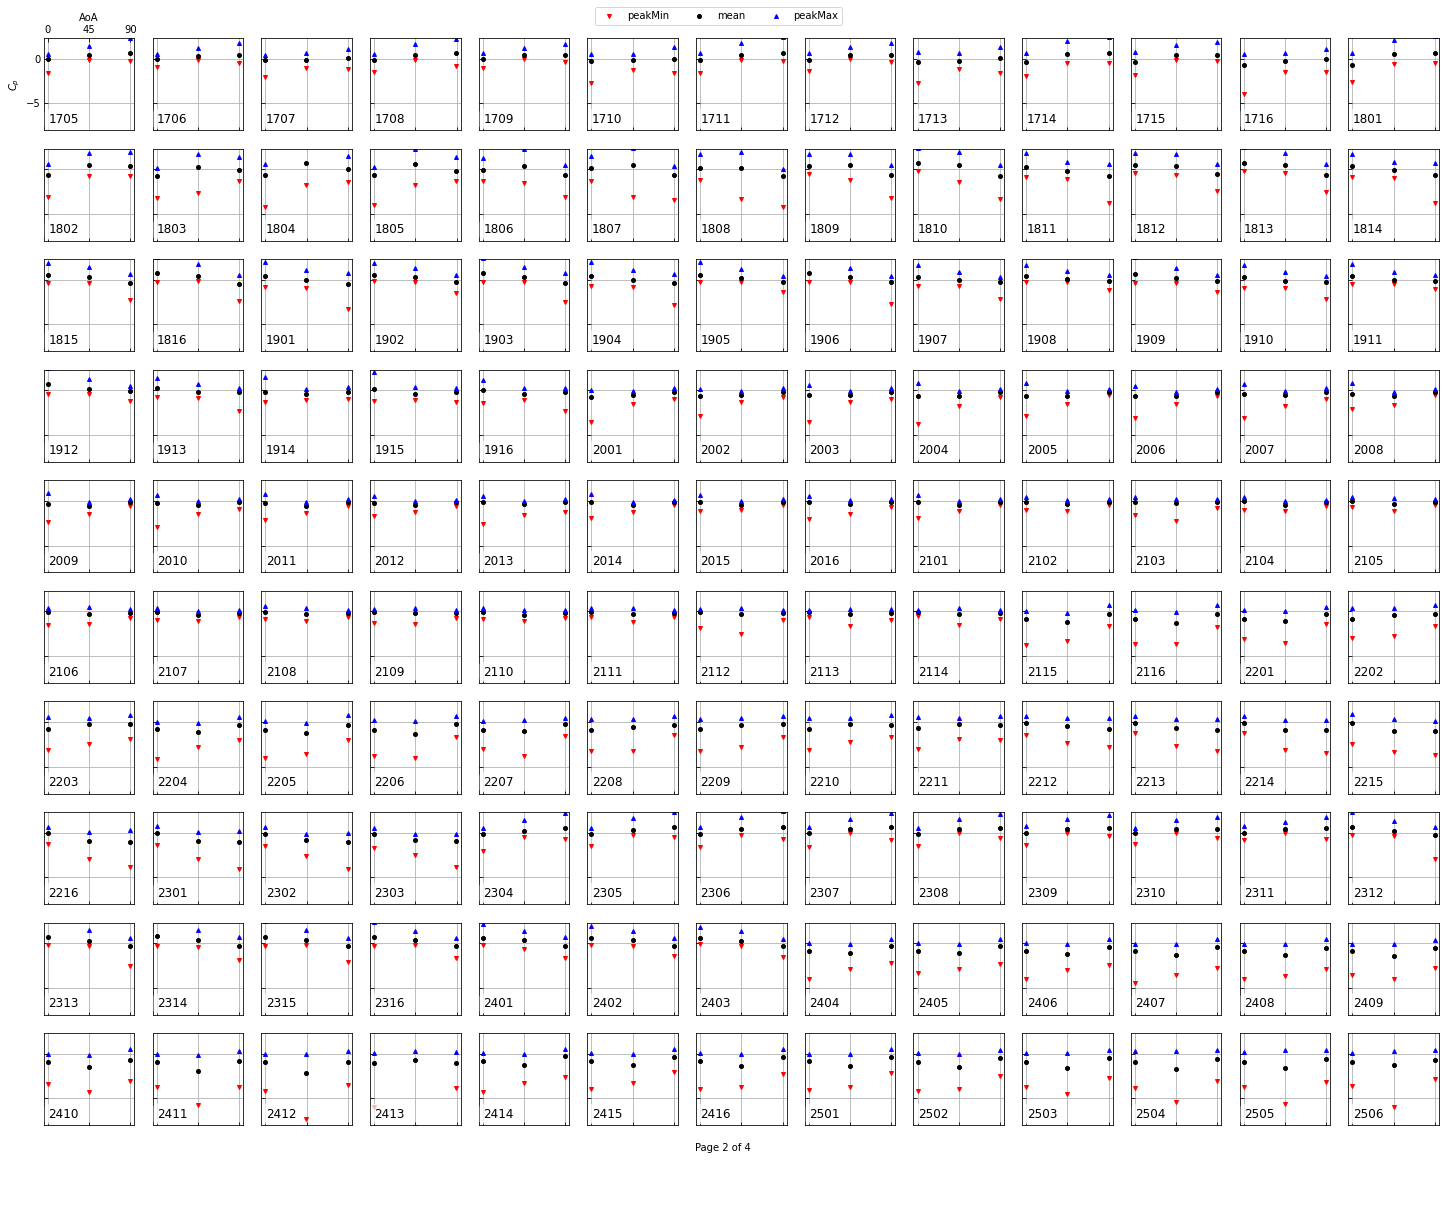

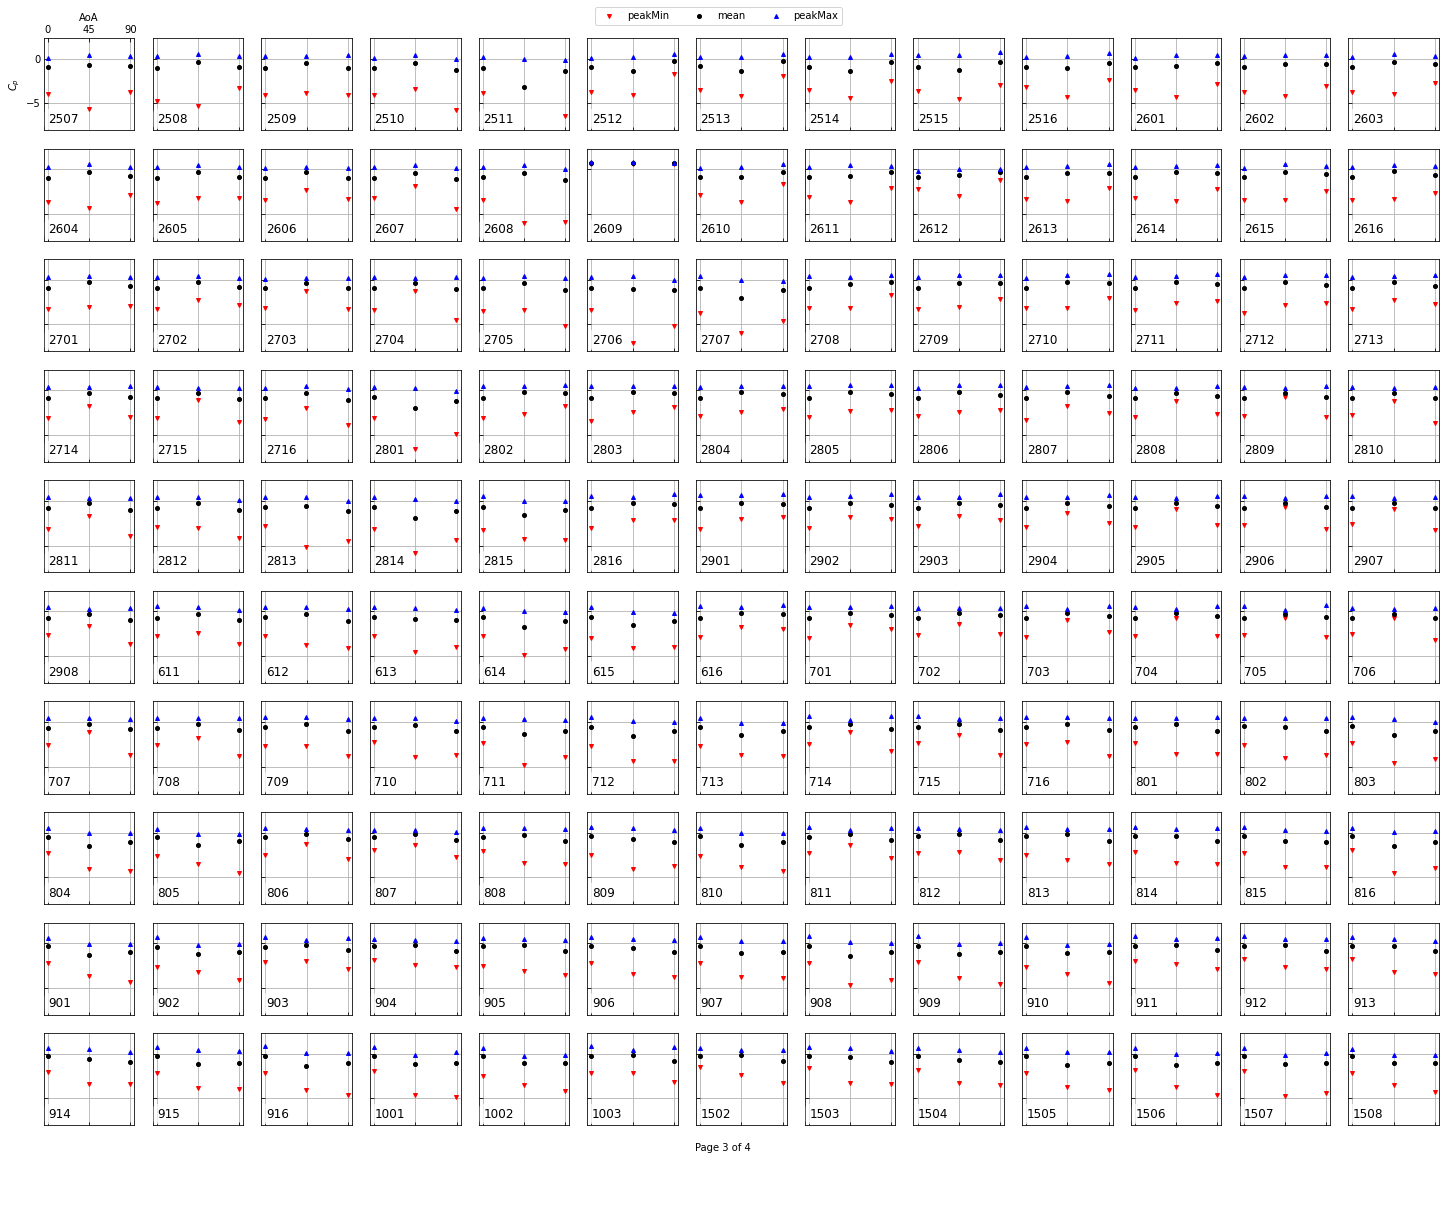

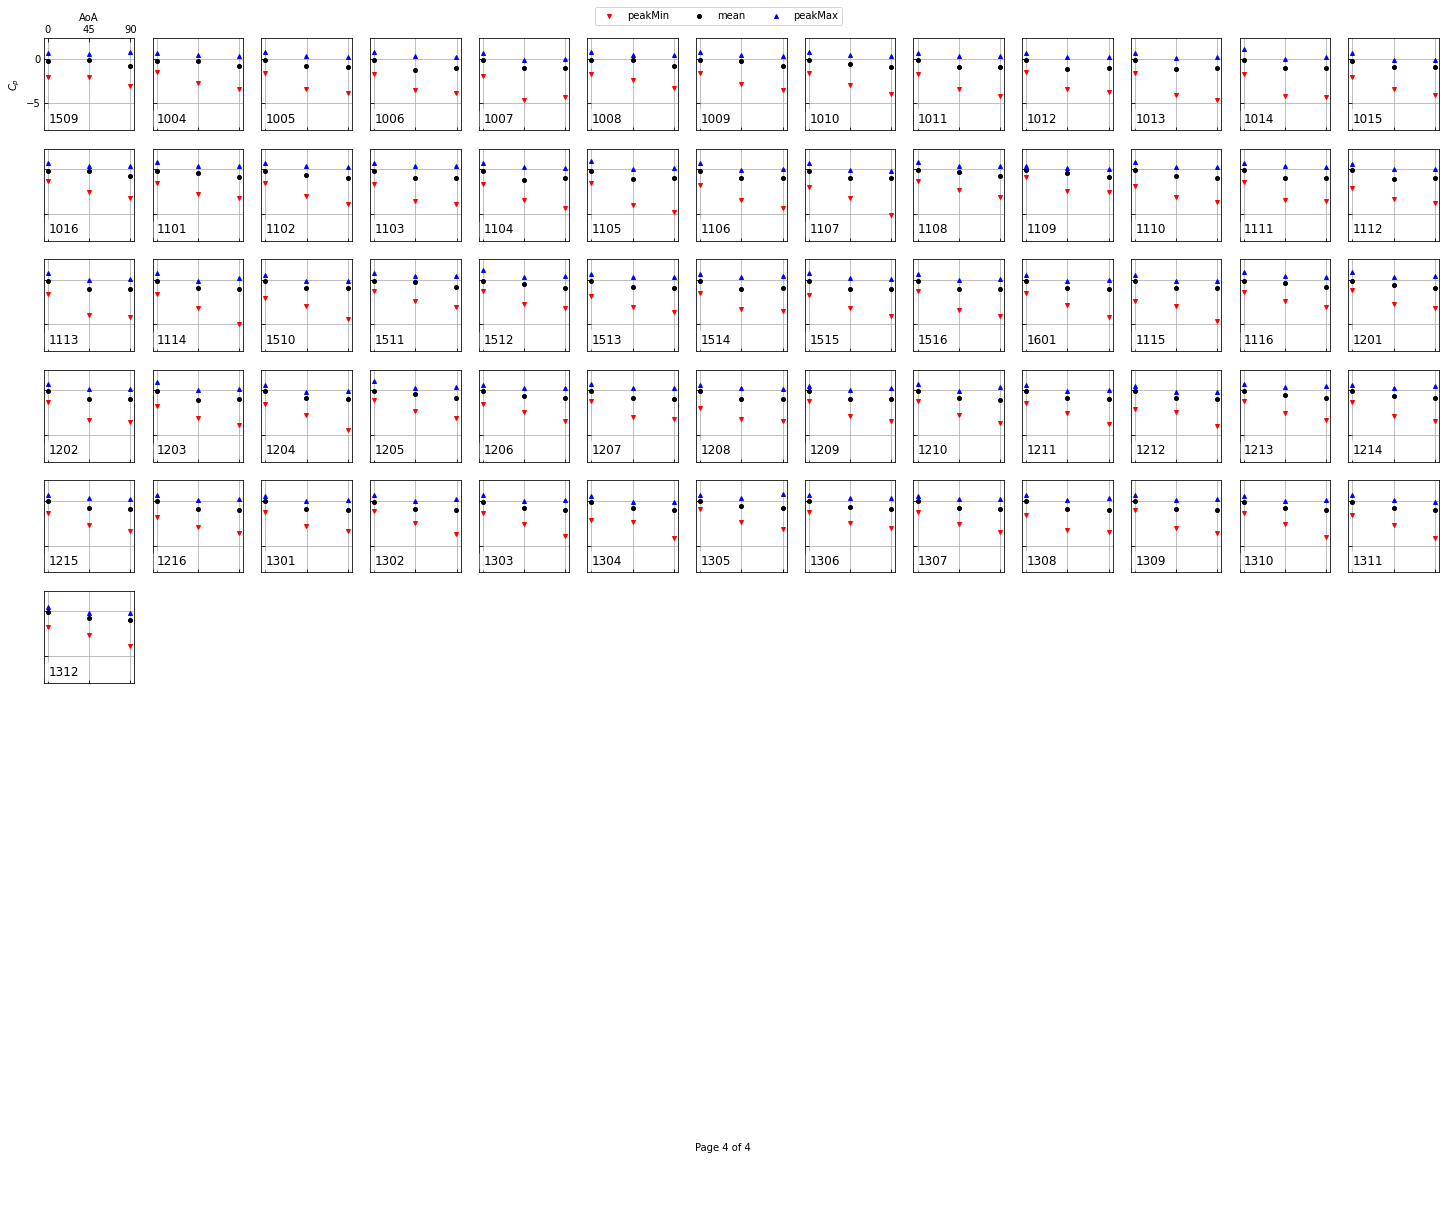

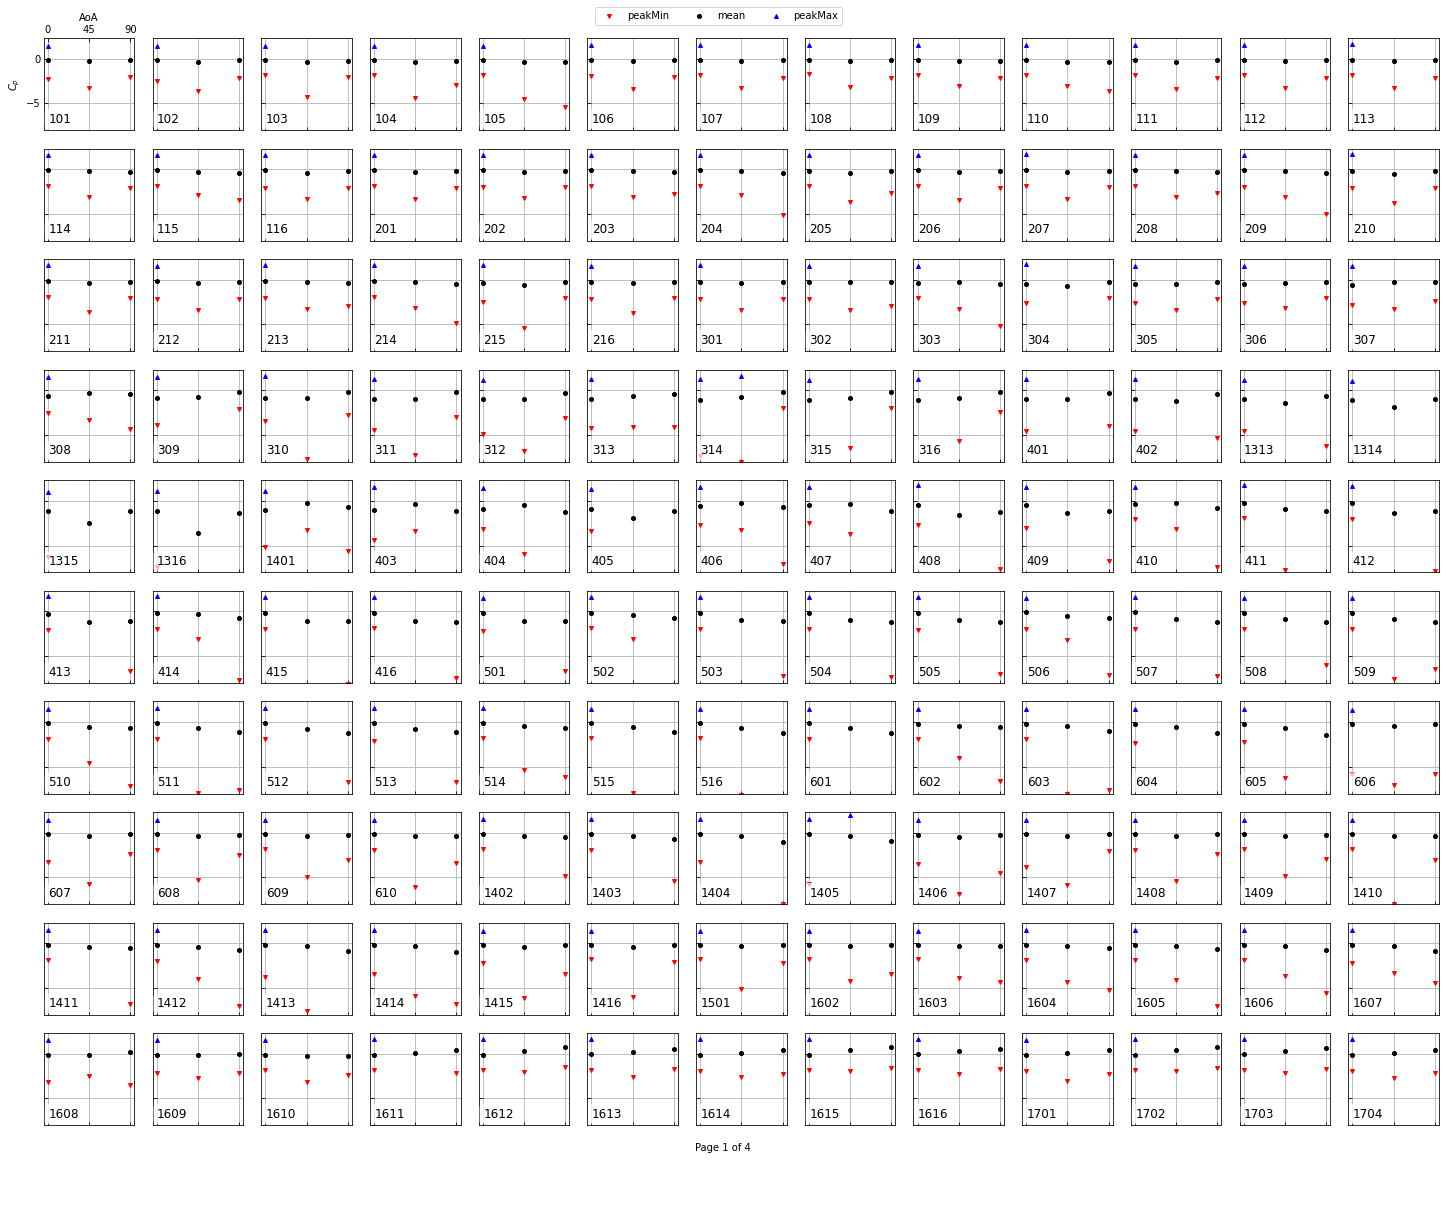

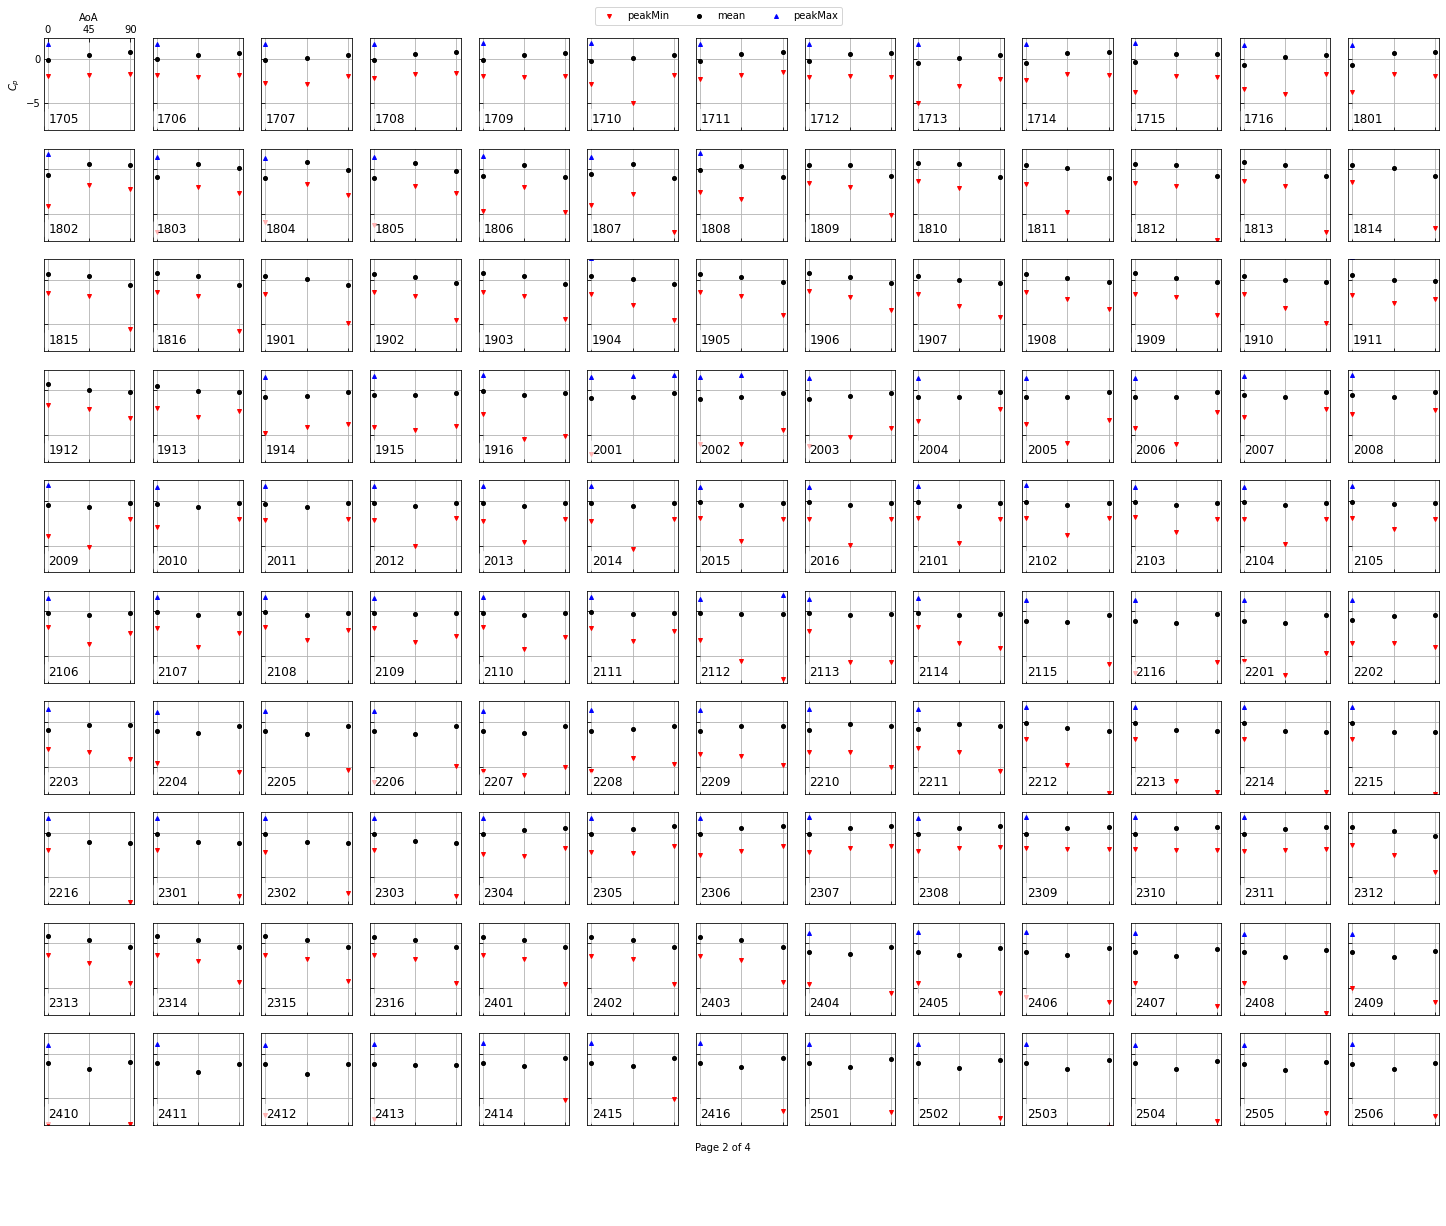

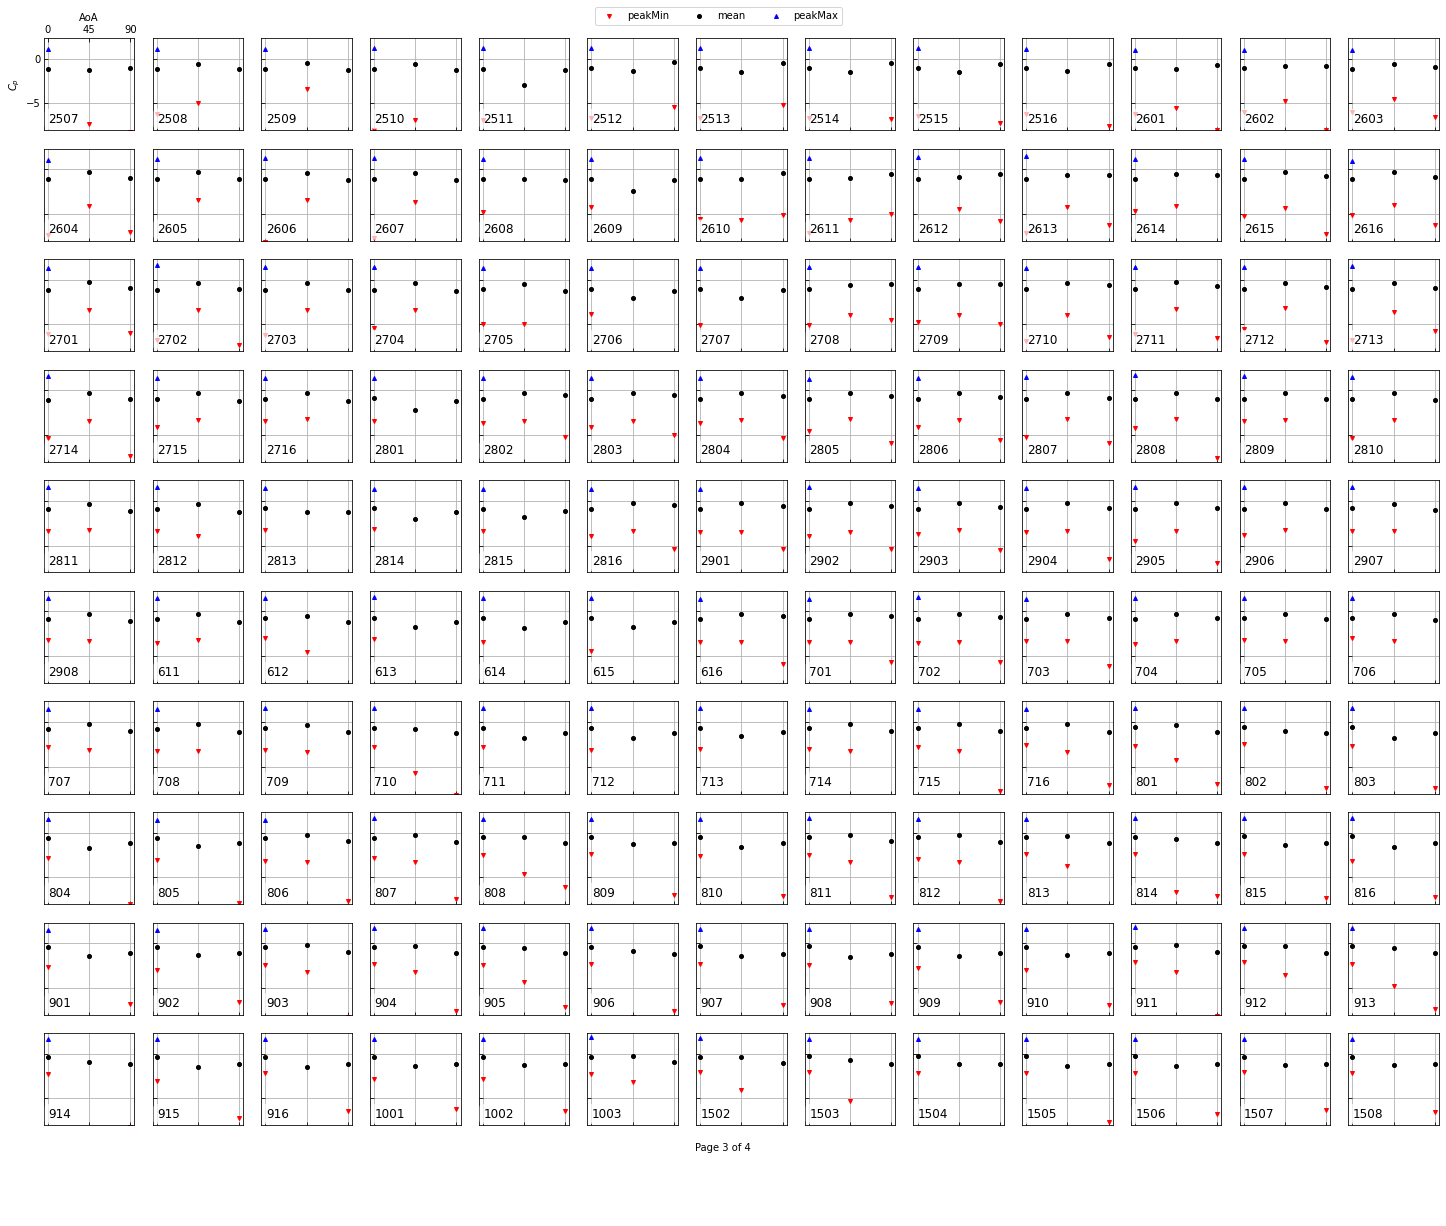

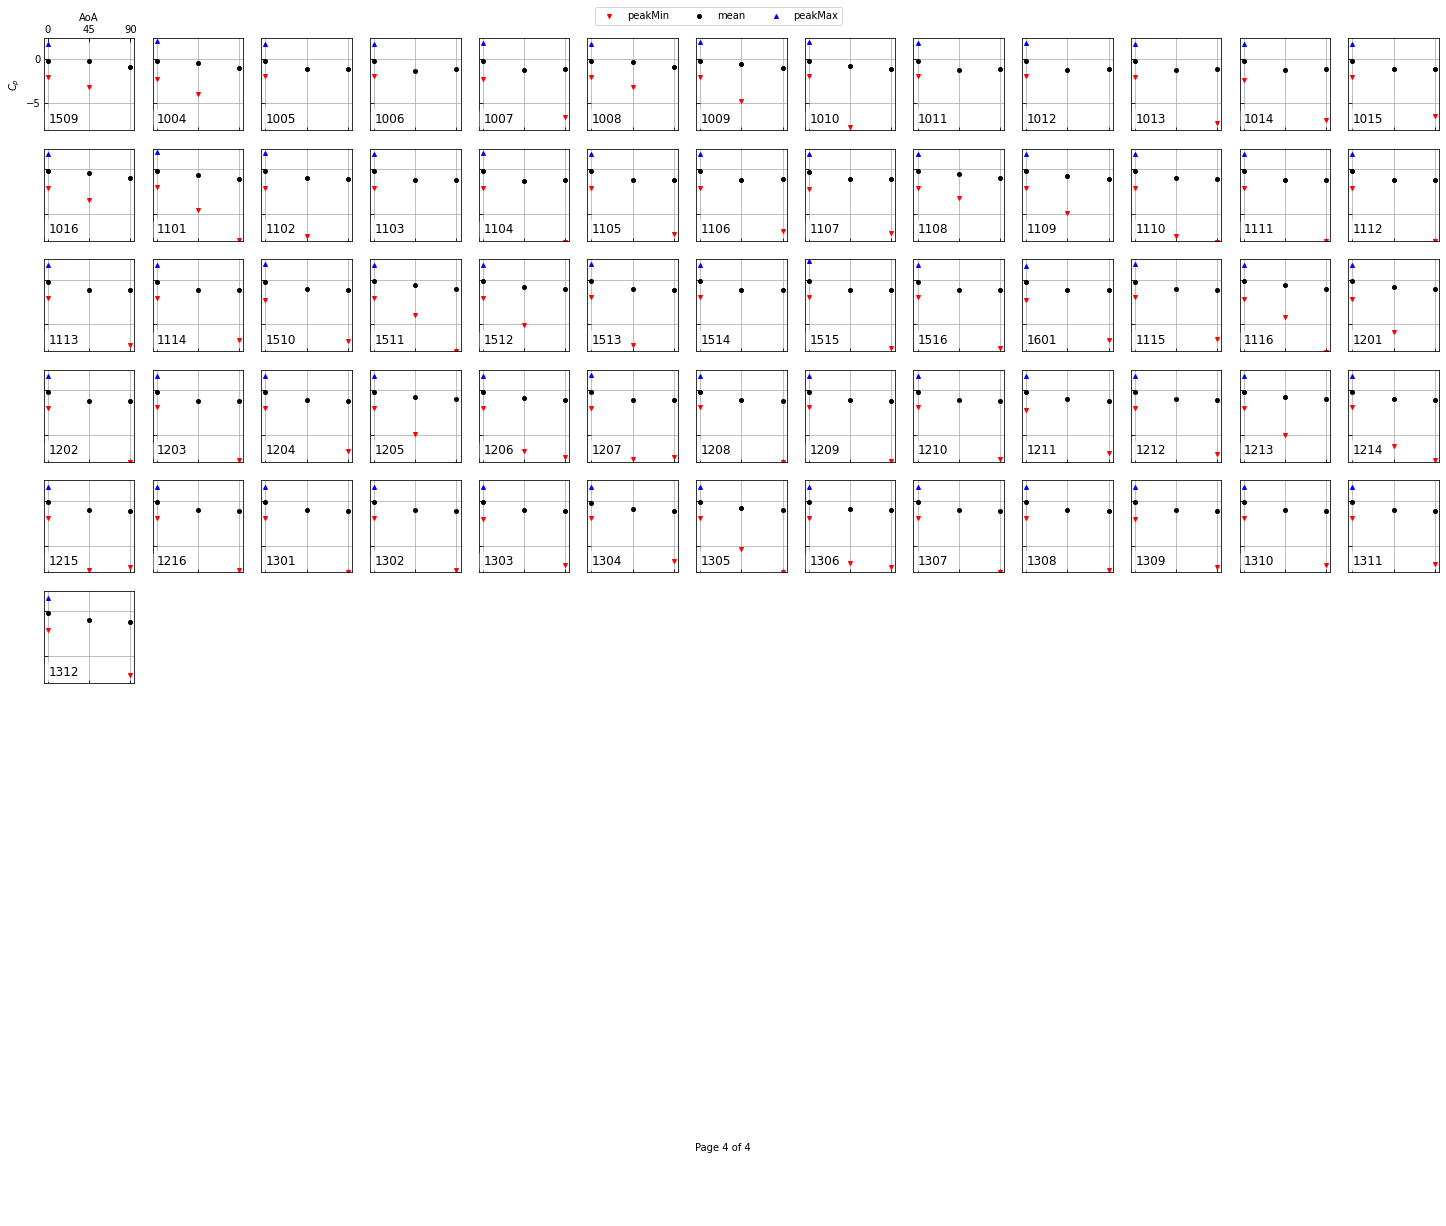

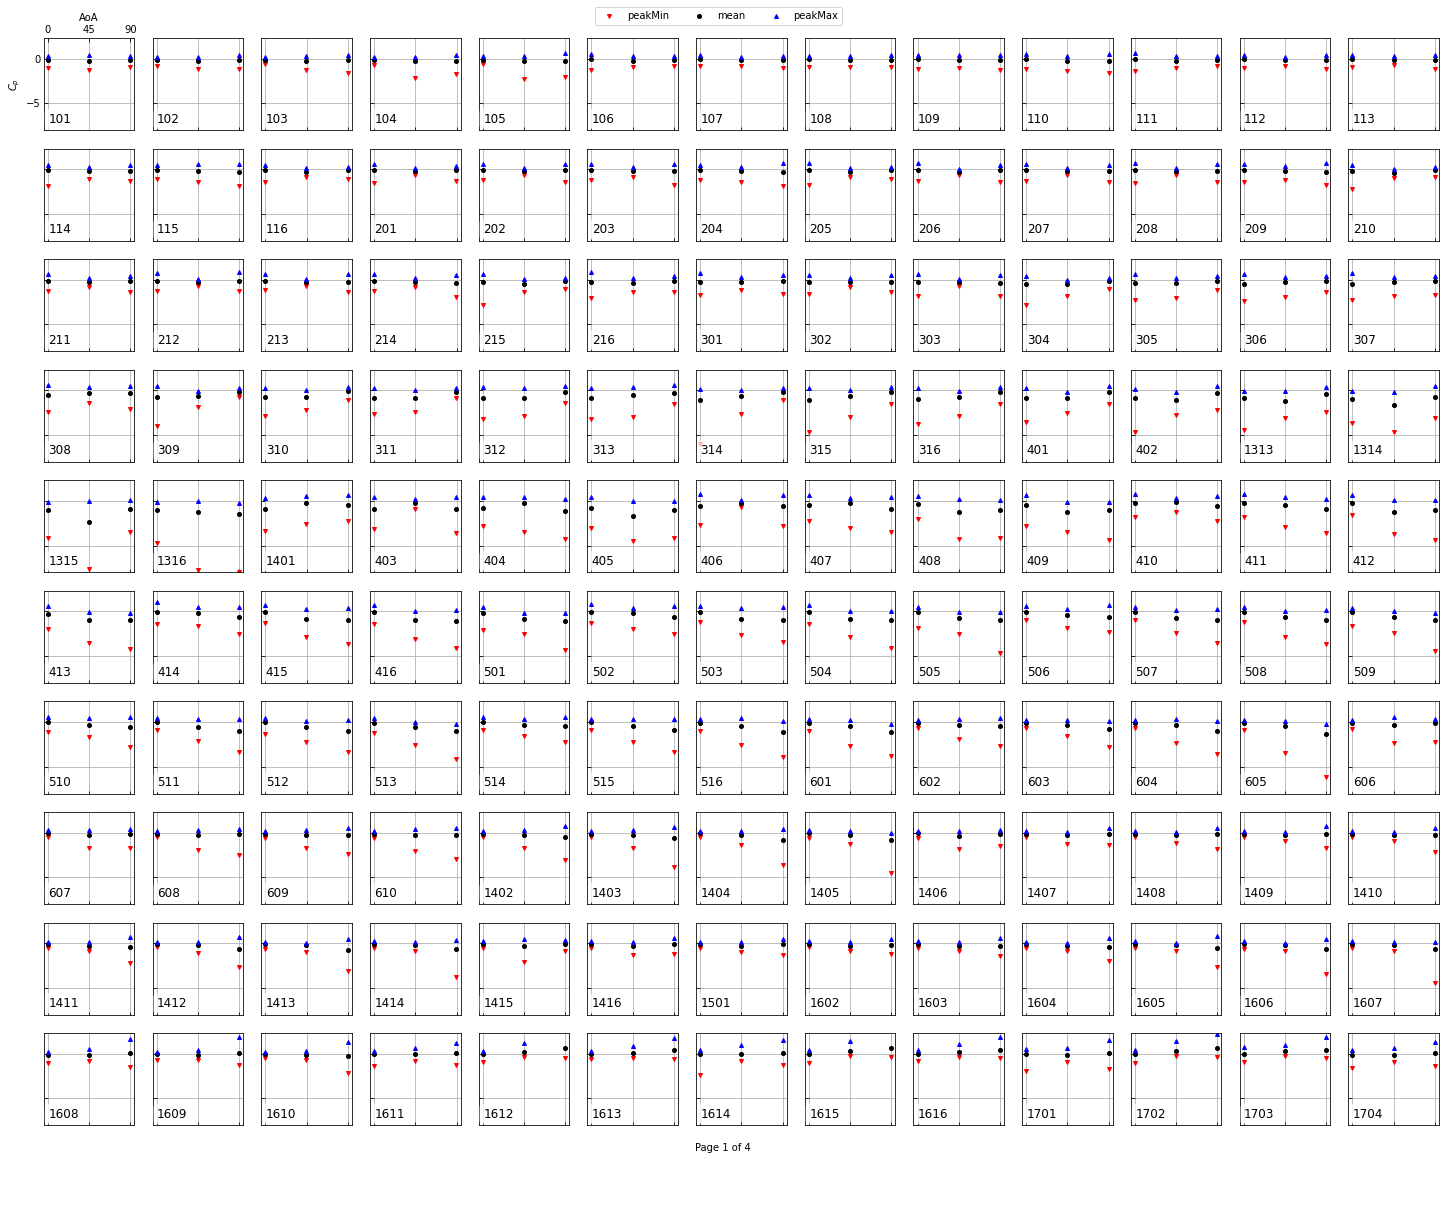

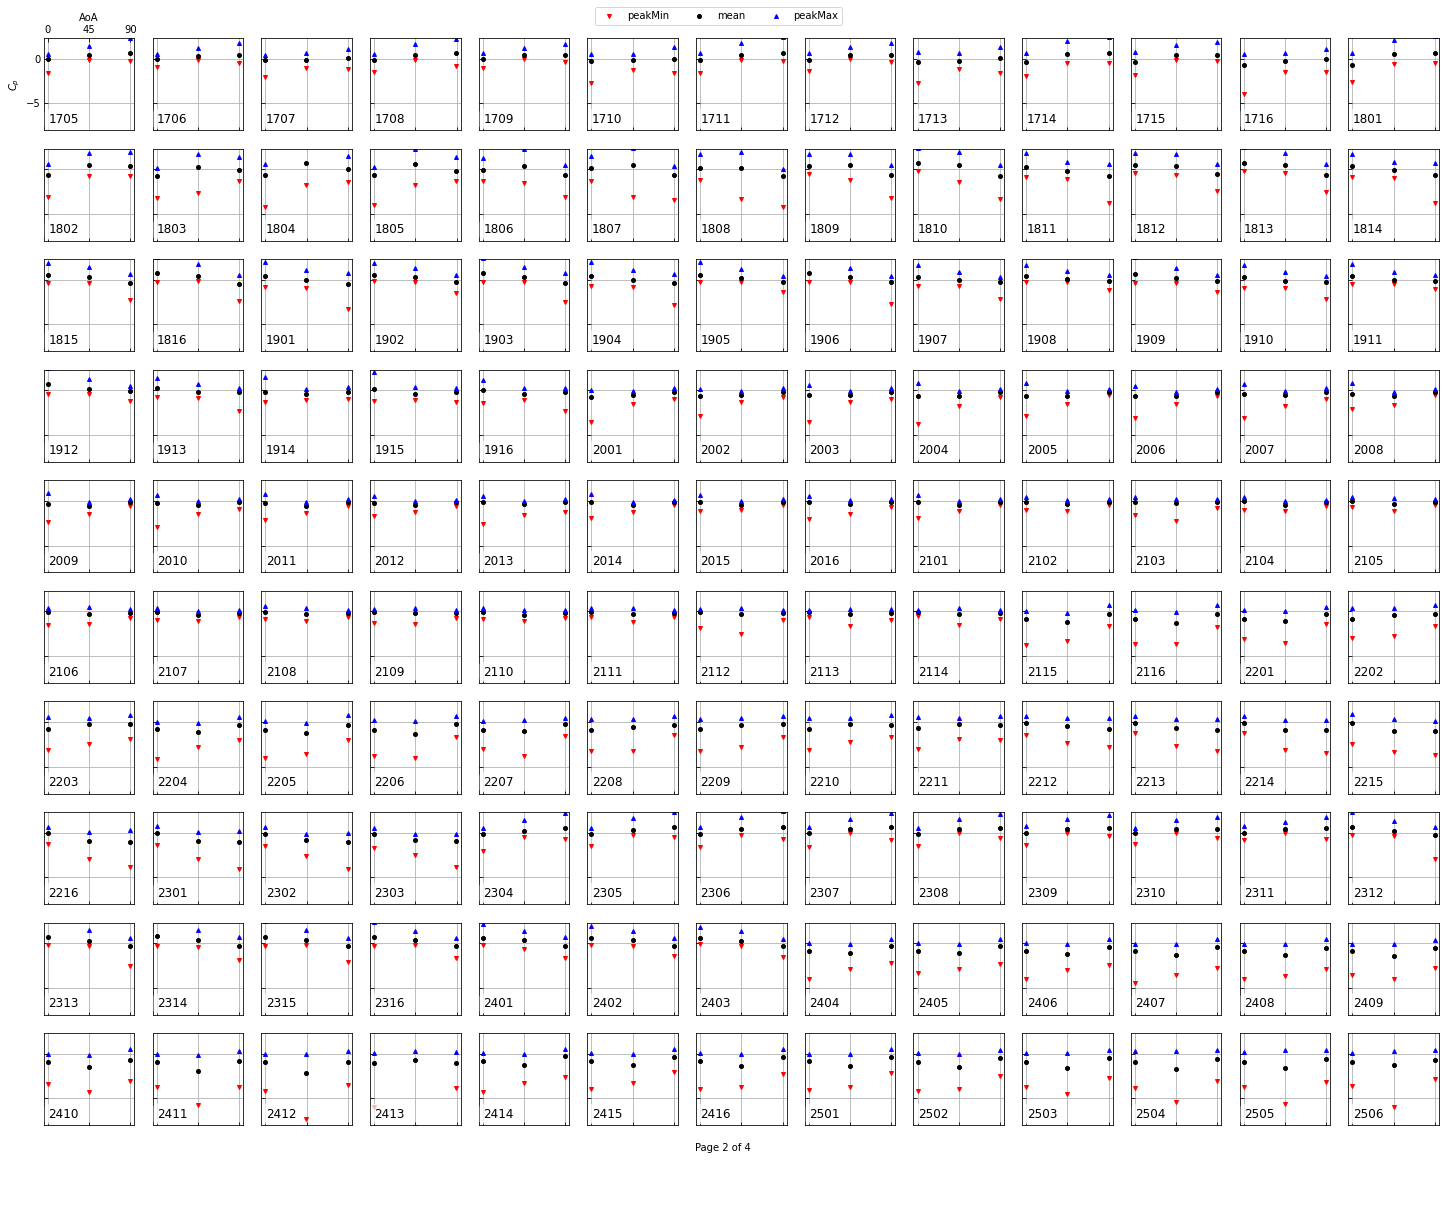

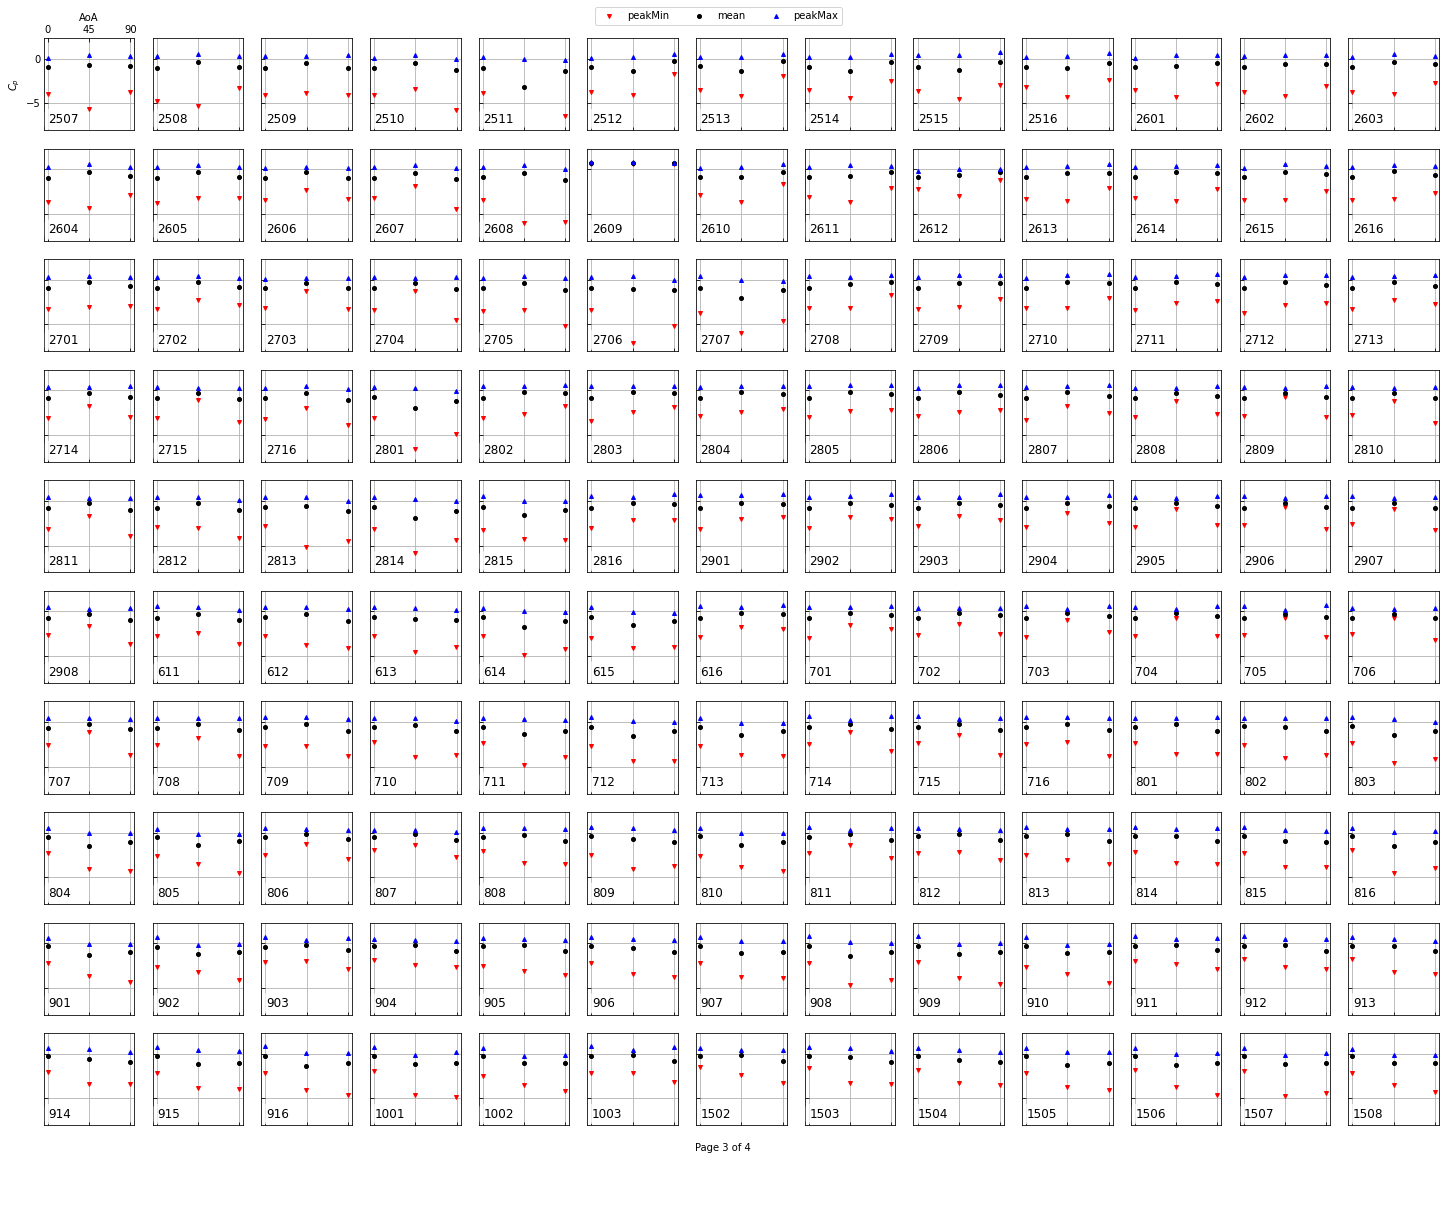

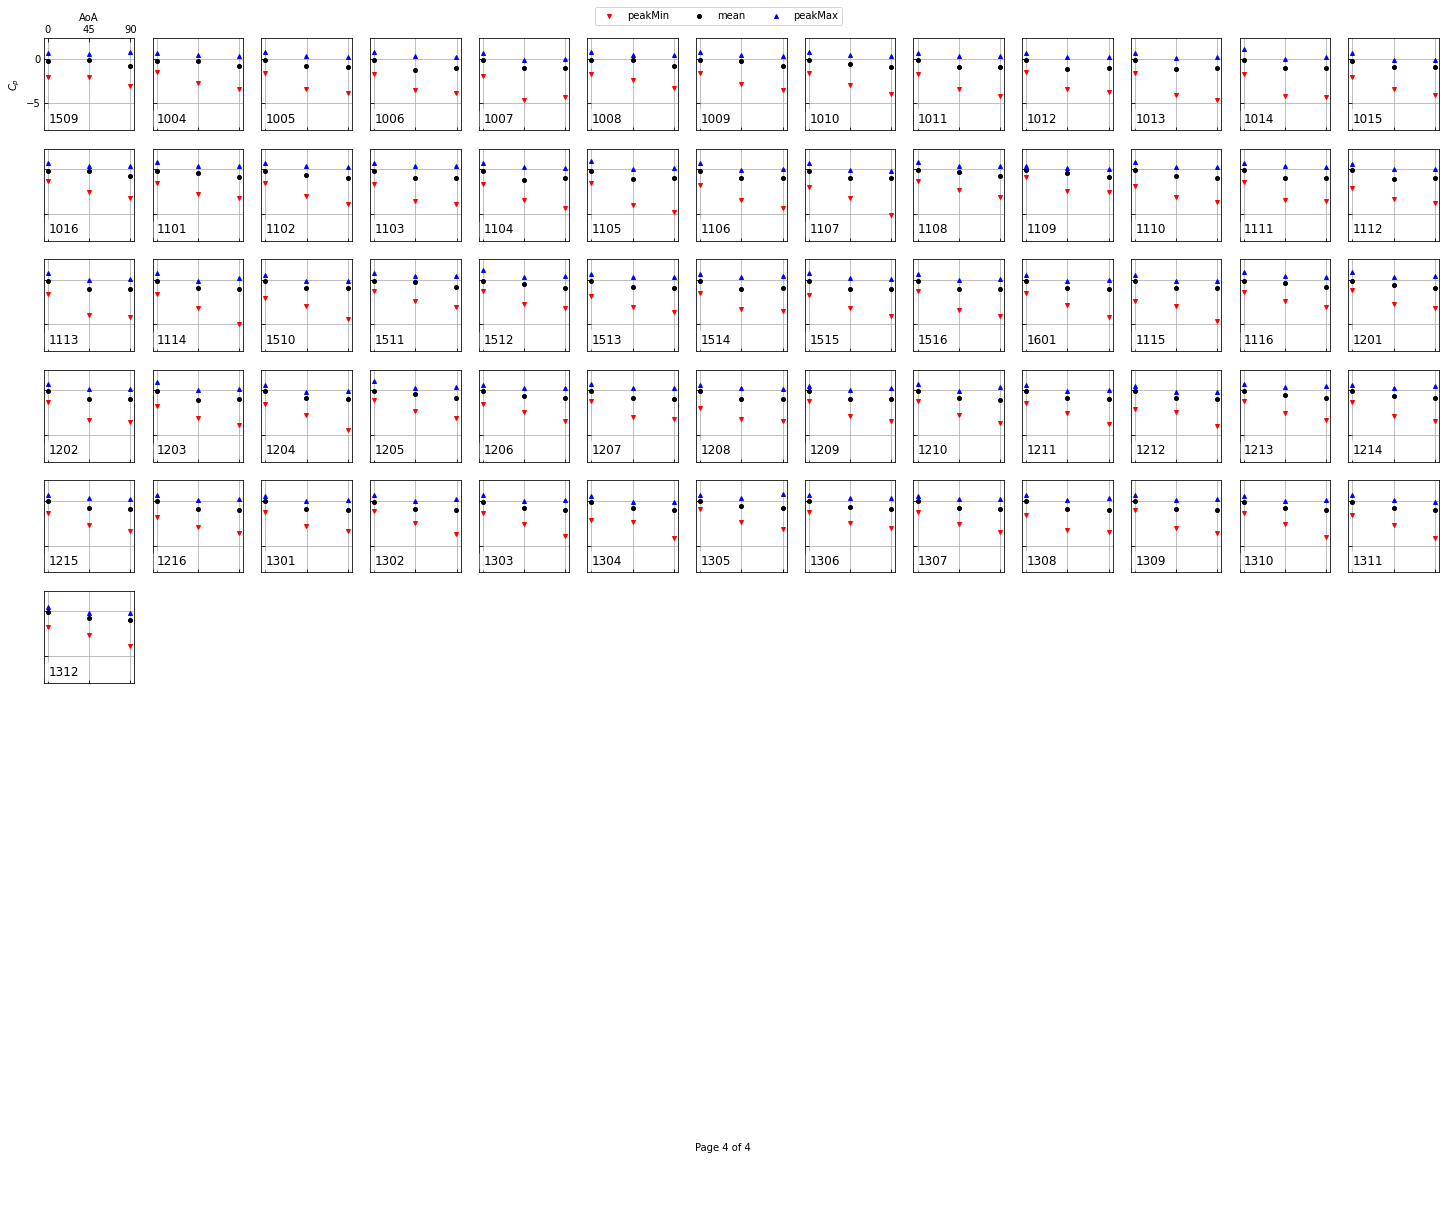

In [55]:
lesCp_E2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(lesCp_E2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])

lesCp_E2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(lesCp_E2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])
wtCp_tngE2.plotTapCpStatsPerAoA(fldRange=[-8,2.3],xticks=np.round(wtCp_tngE2.AoA,0),pageNo_xy=(0.5,0.06),nCols=13, figsize=[25,20])